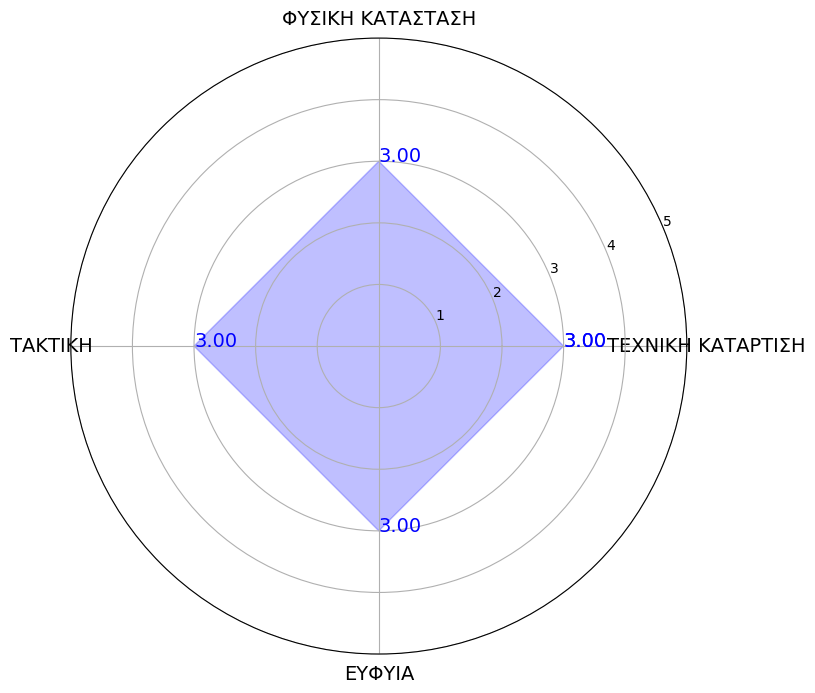

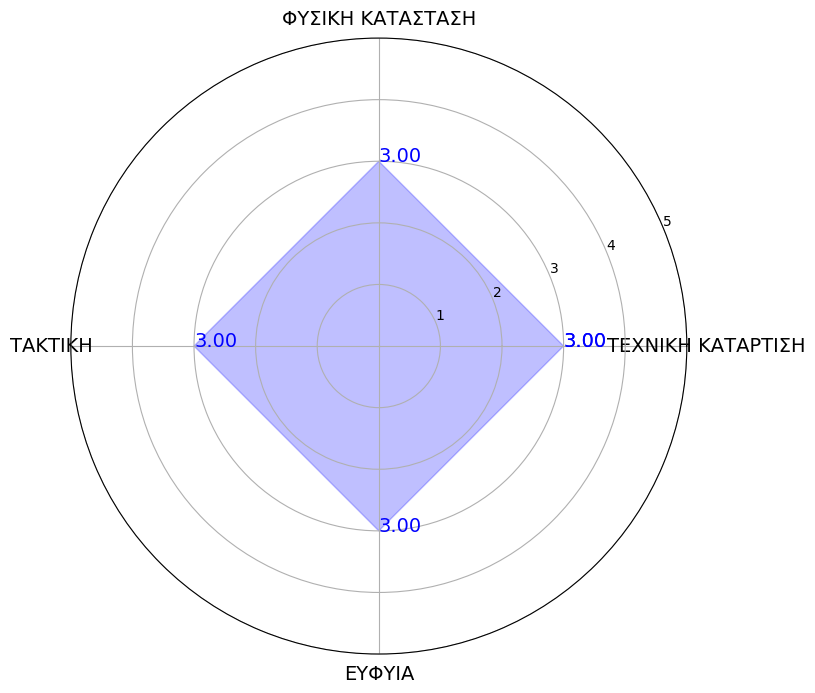

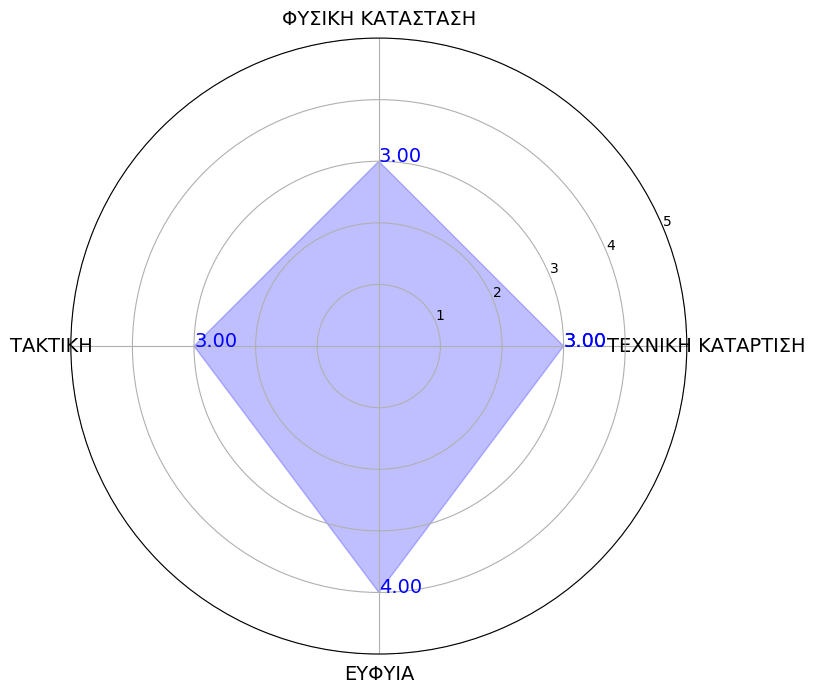

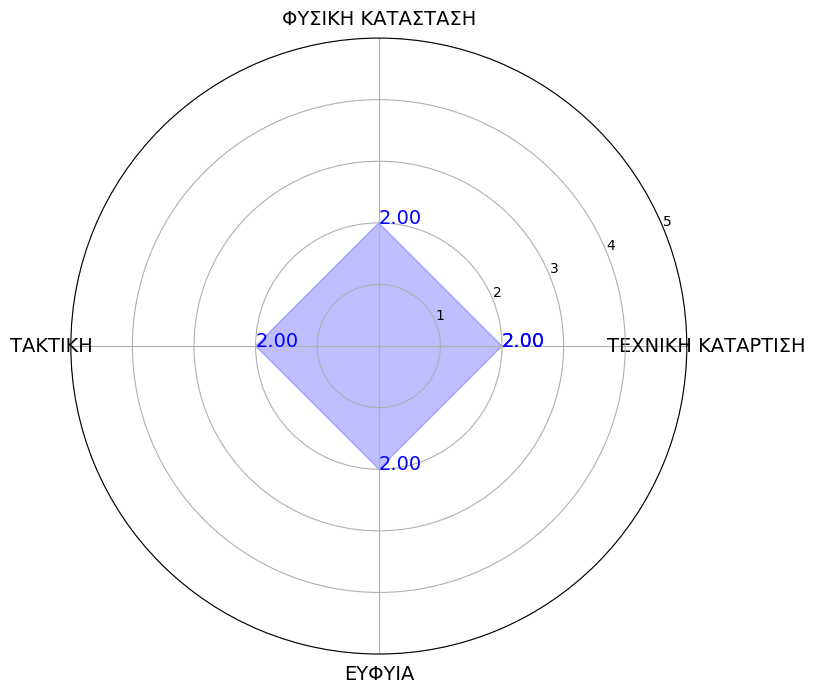

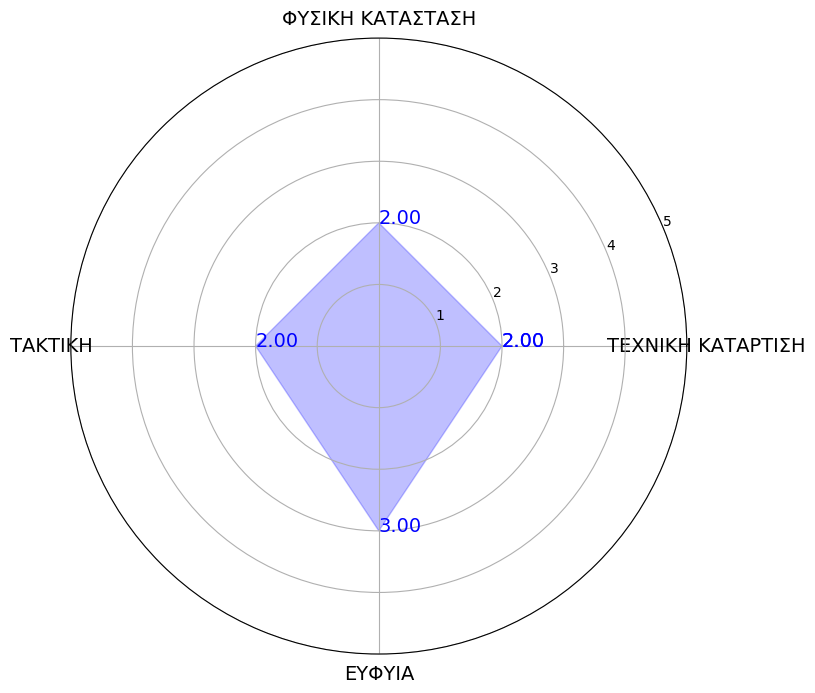

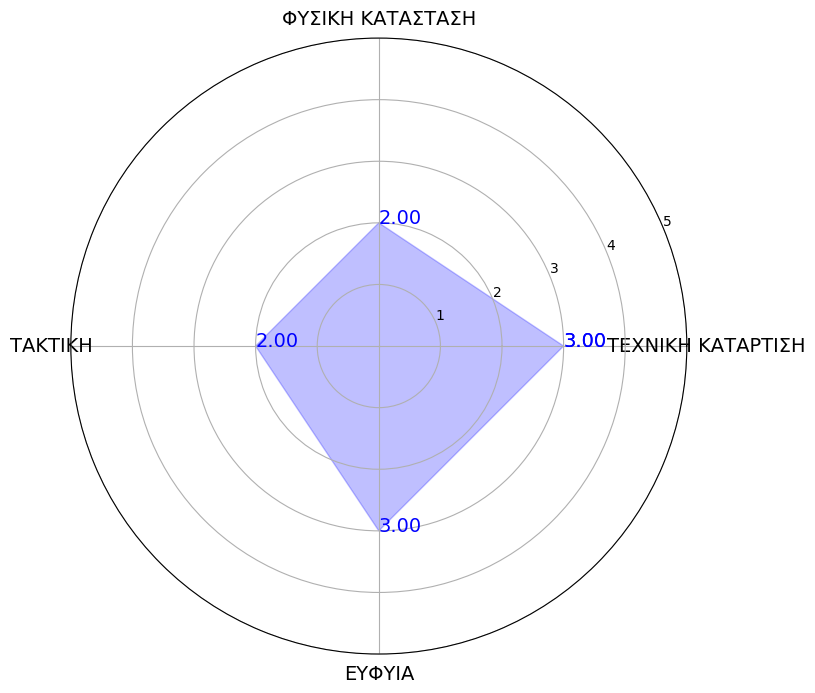

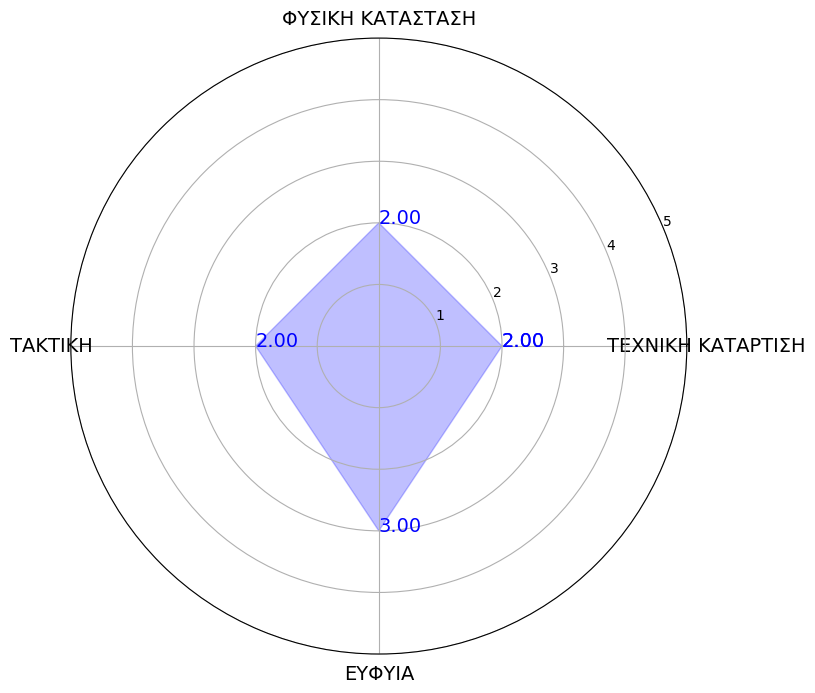

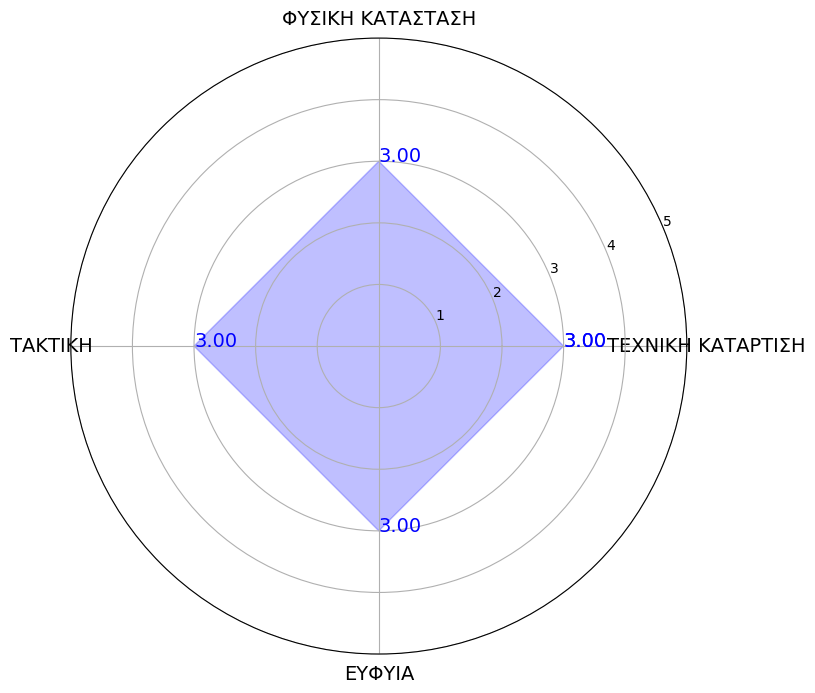

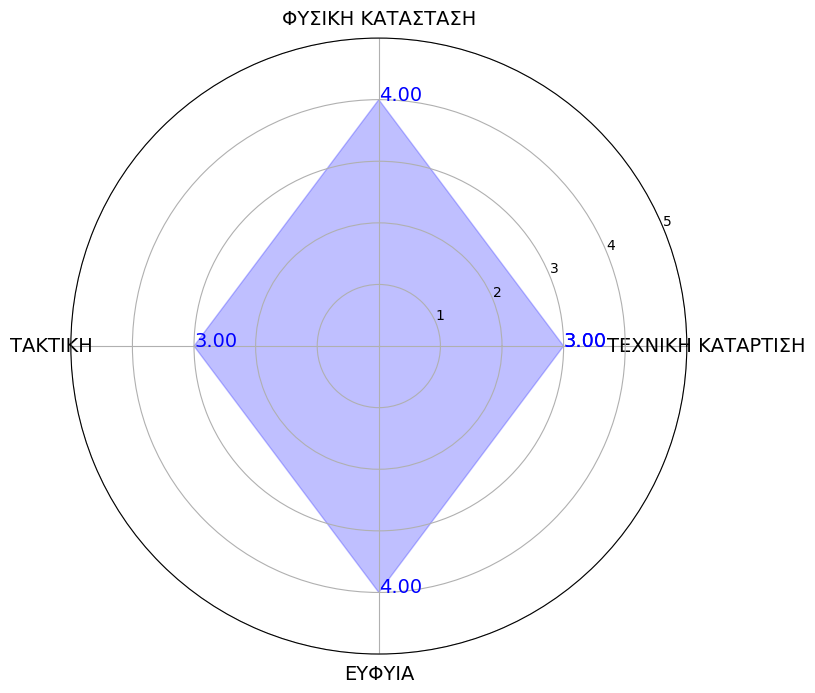

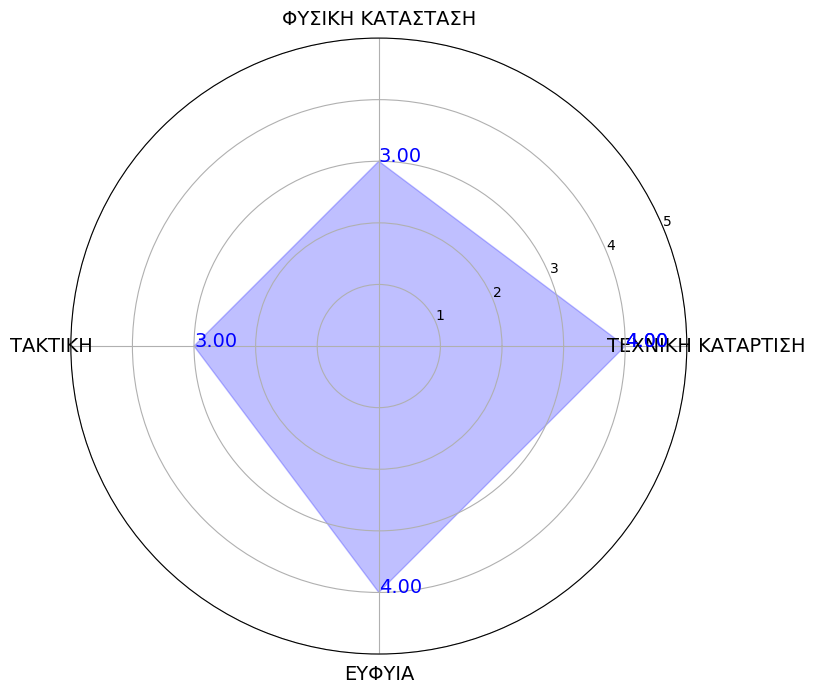

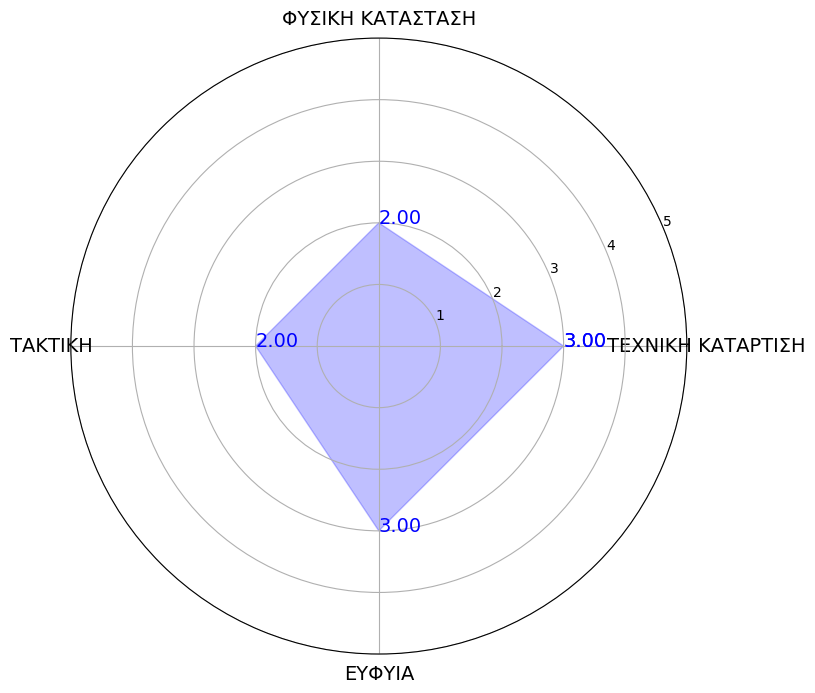

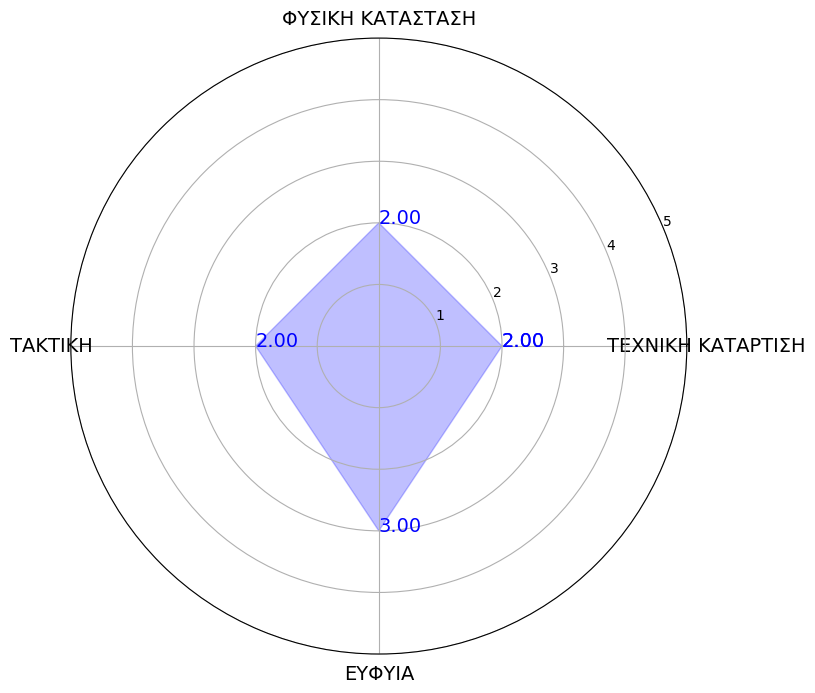

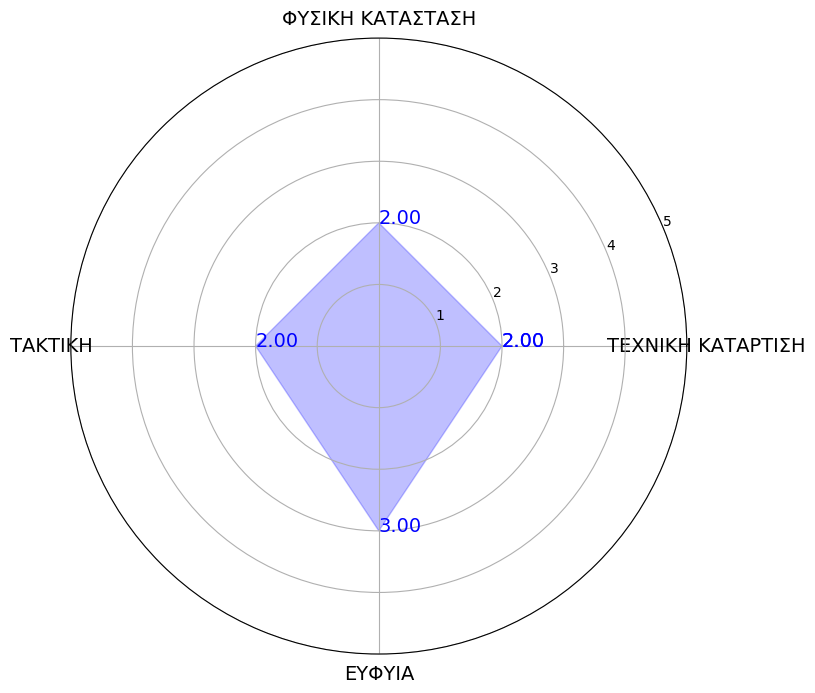

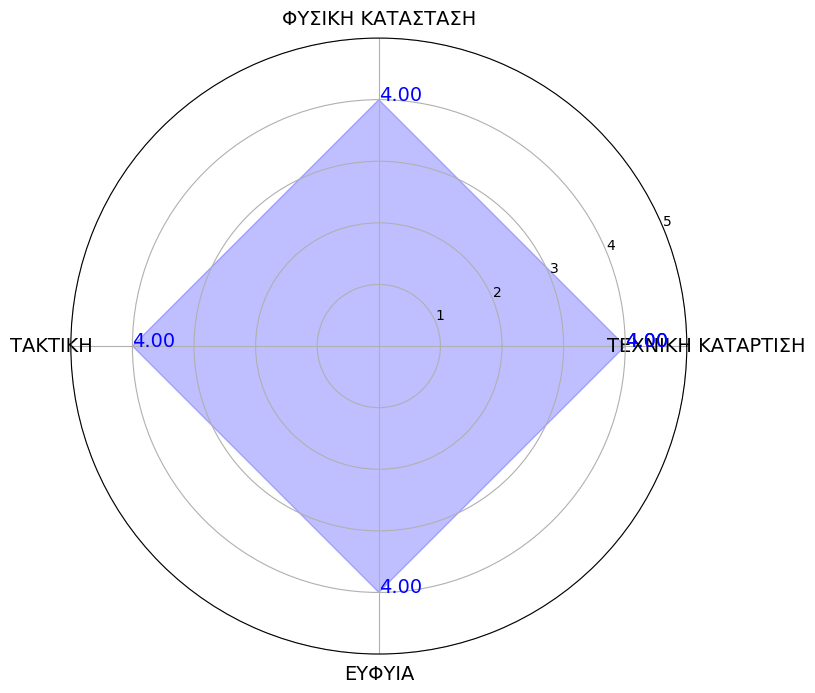

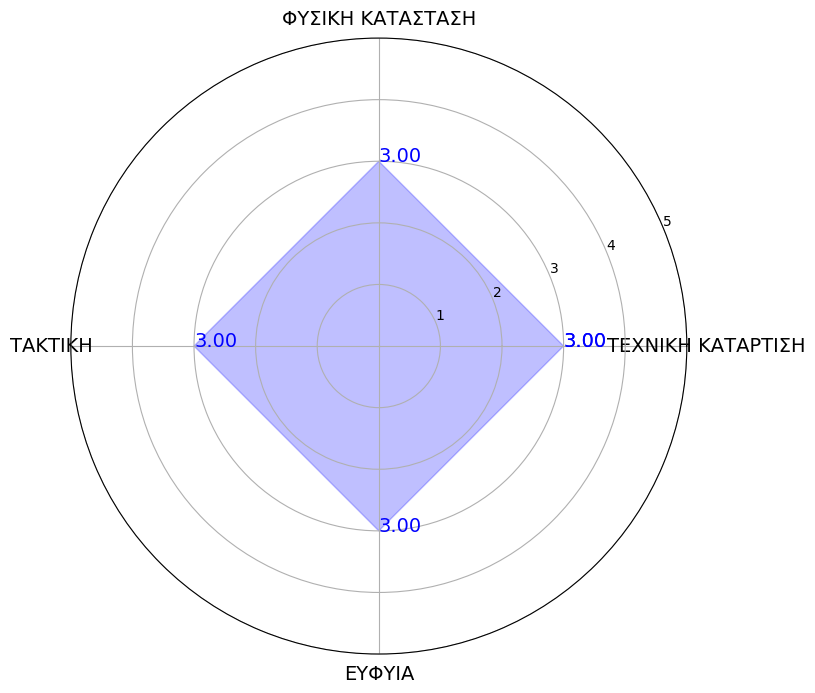

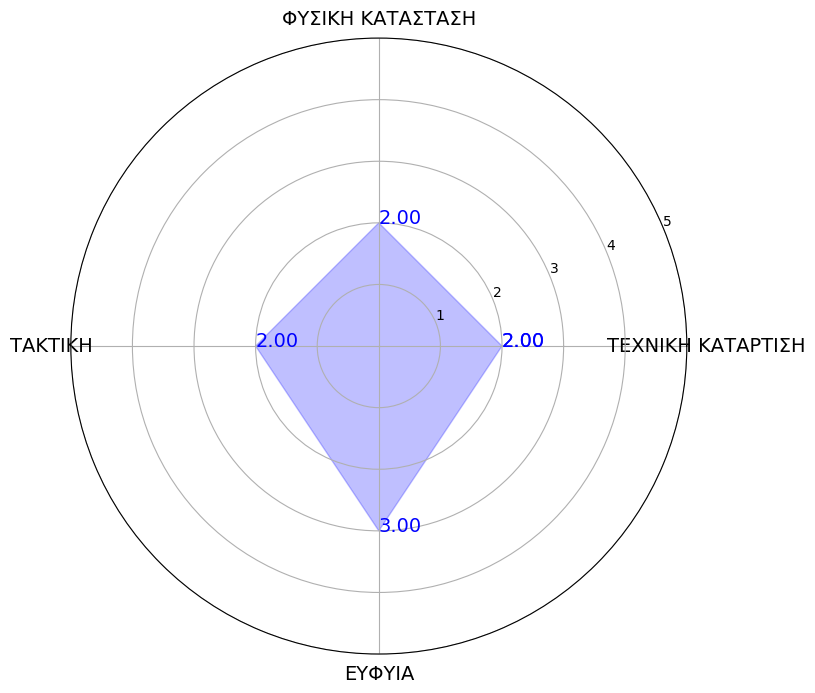

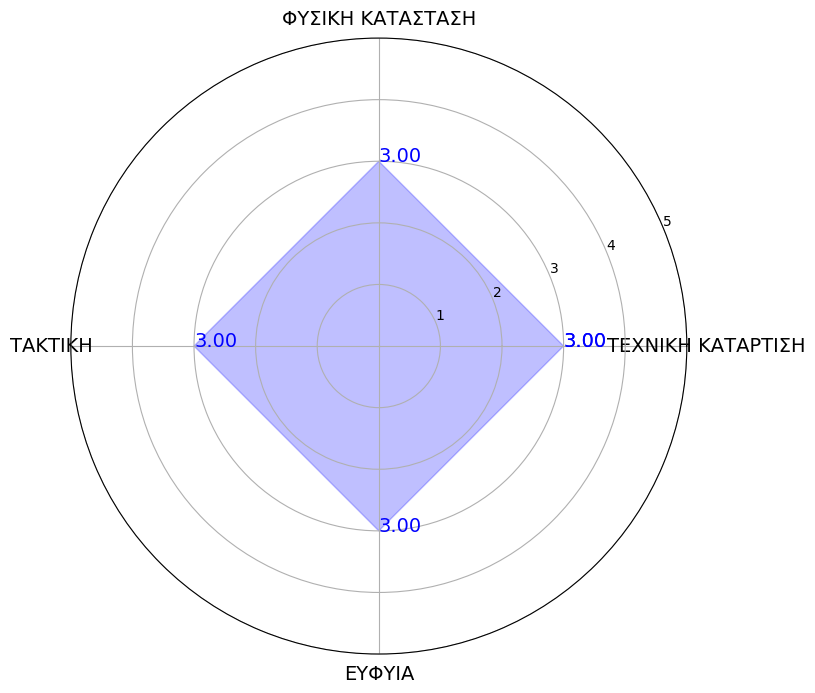

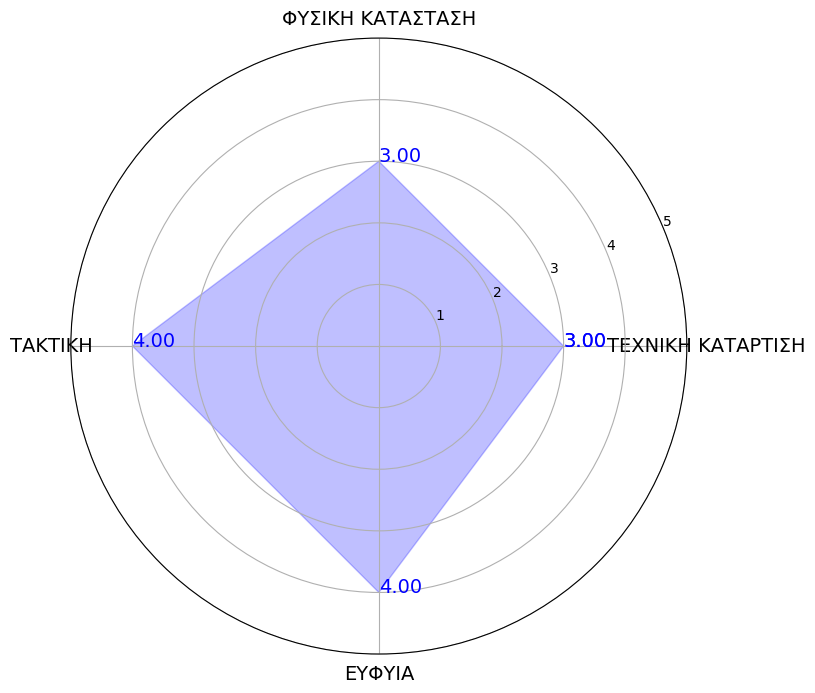

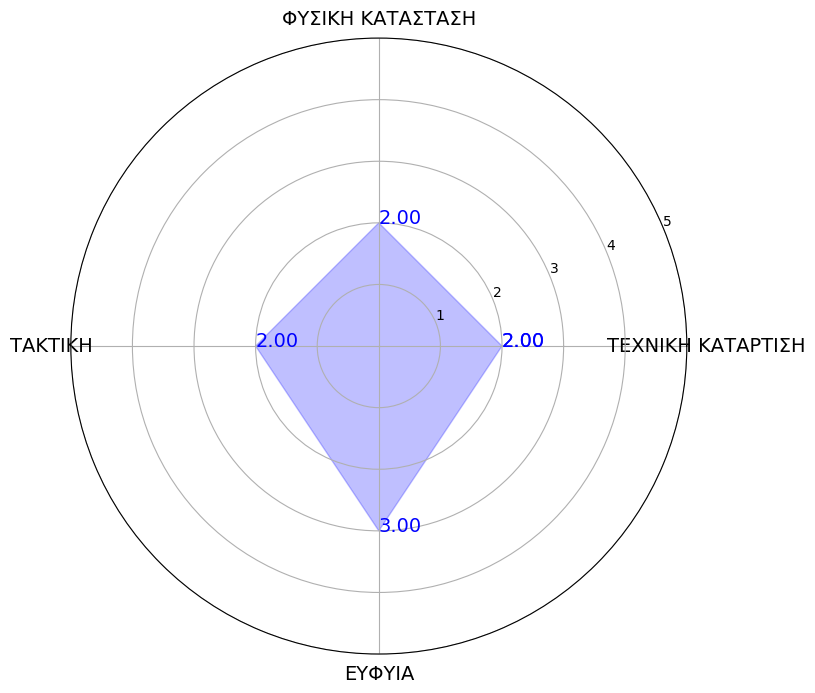

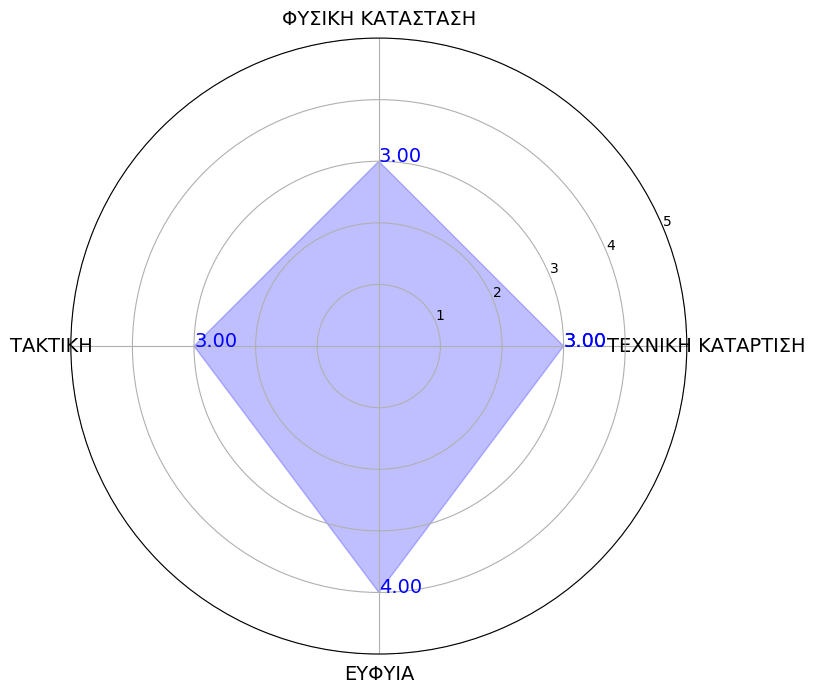

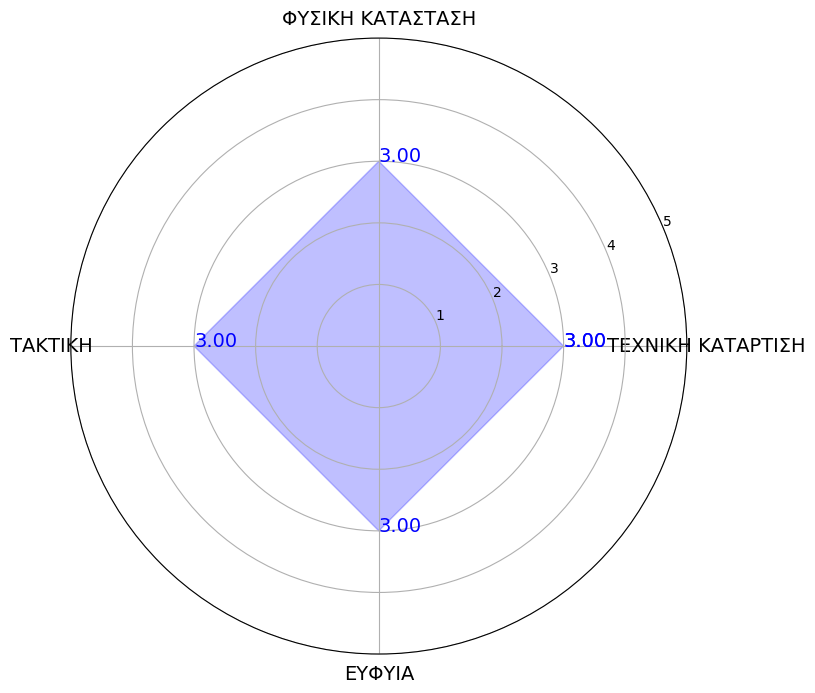

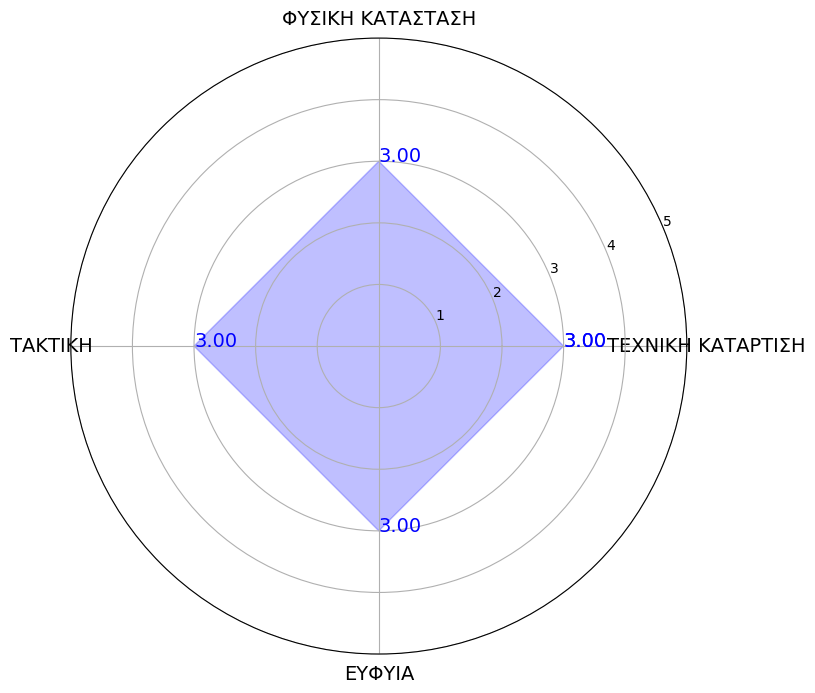

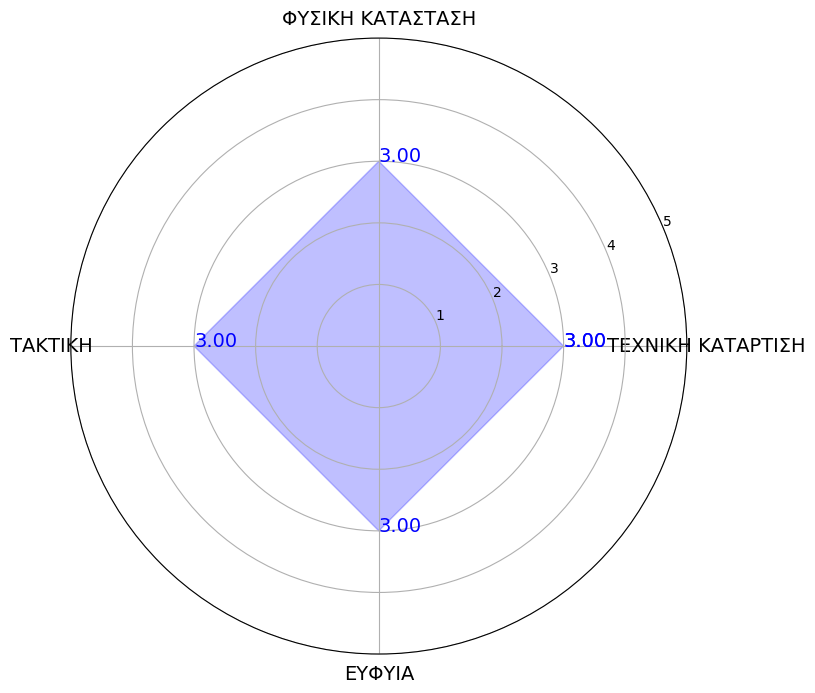

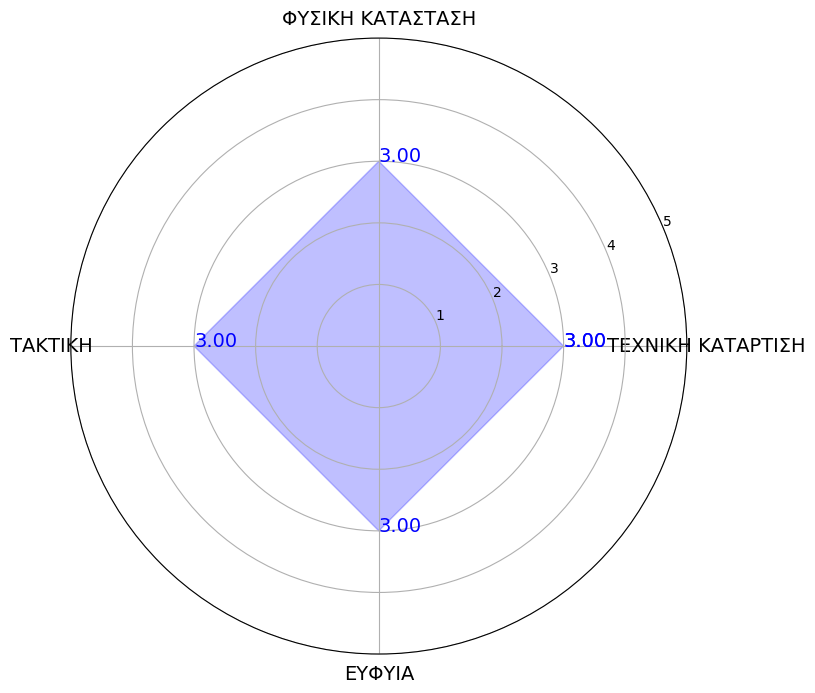

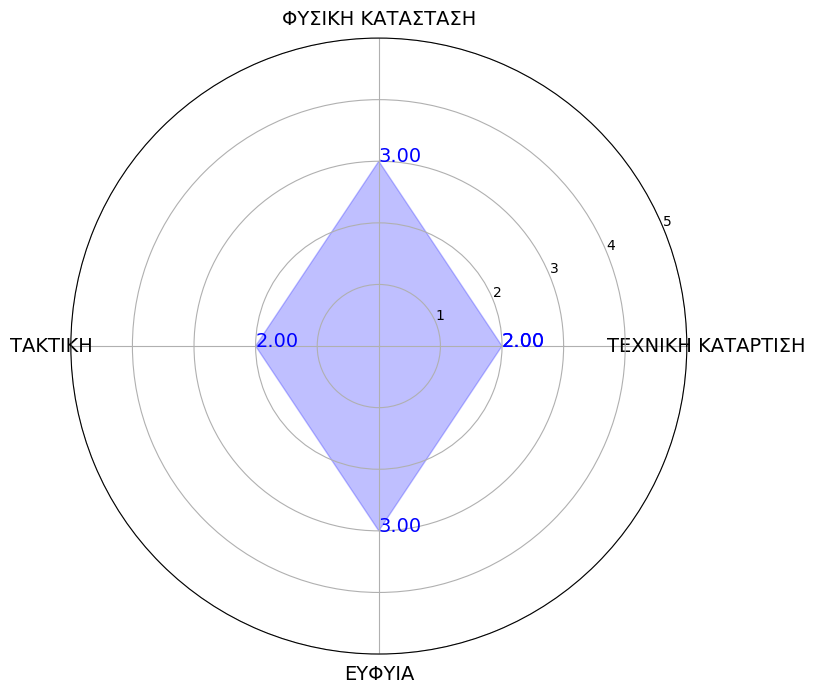

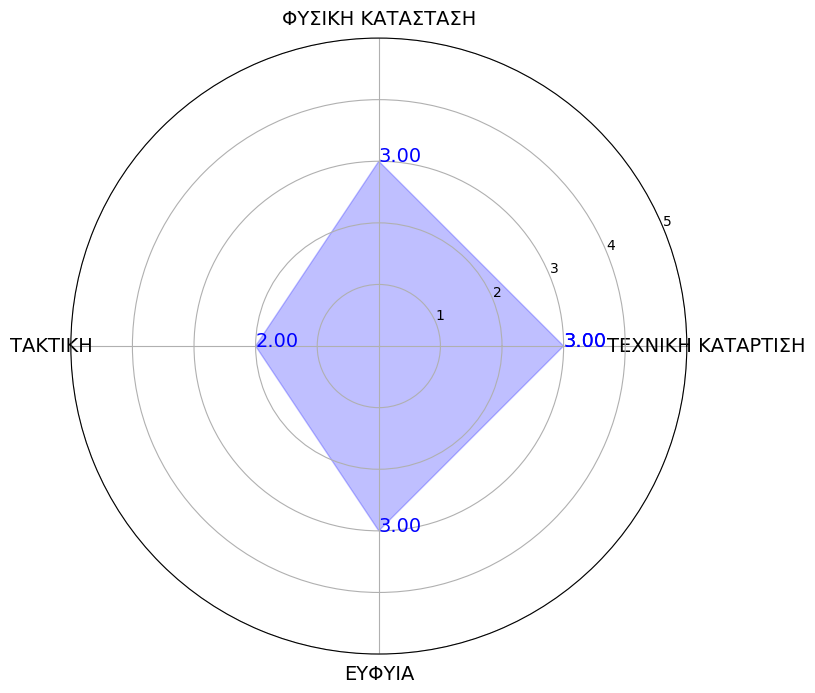

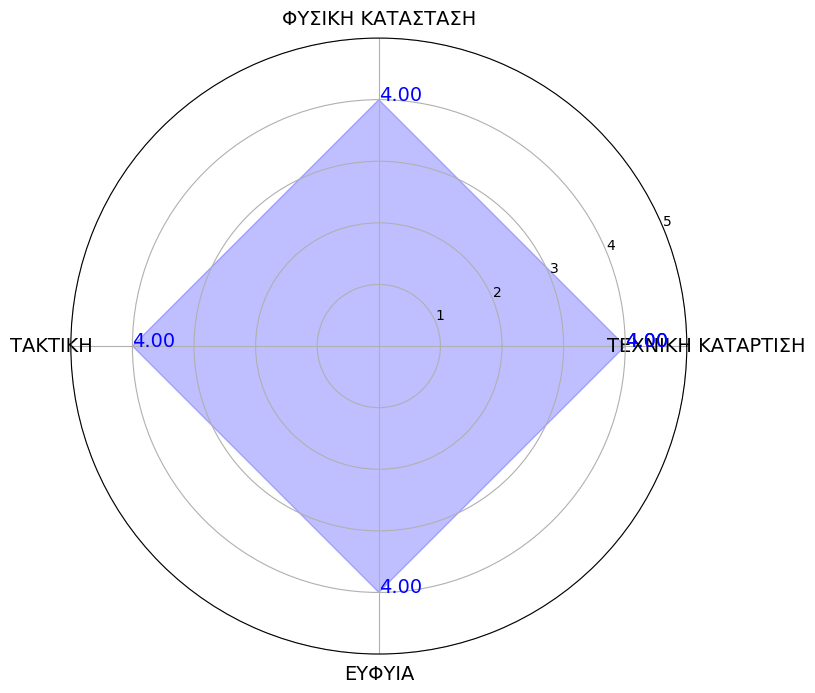

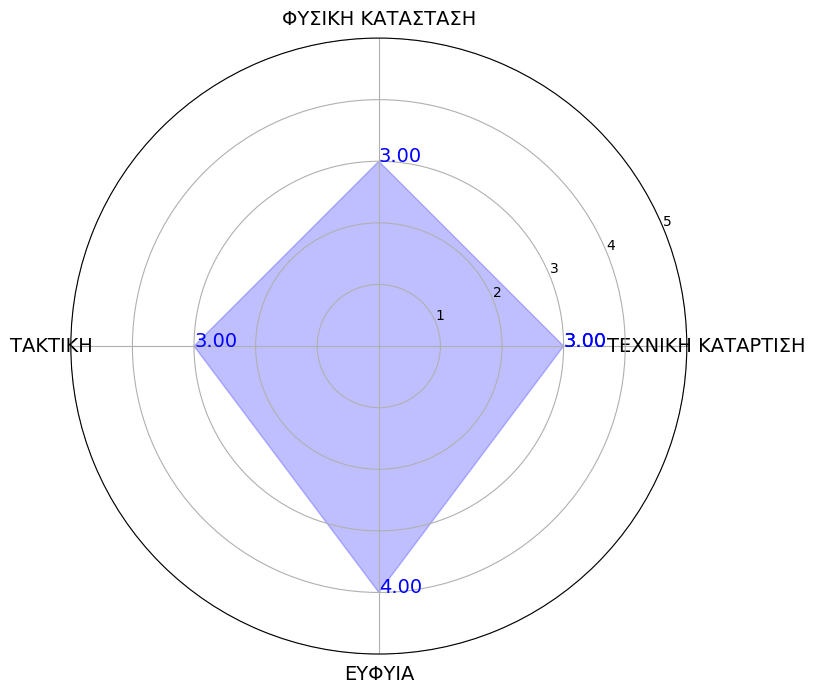

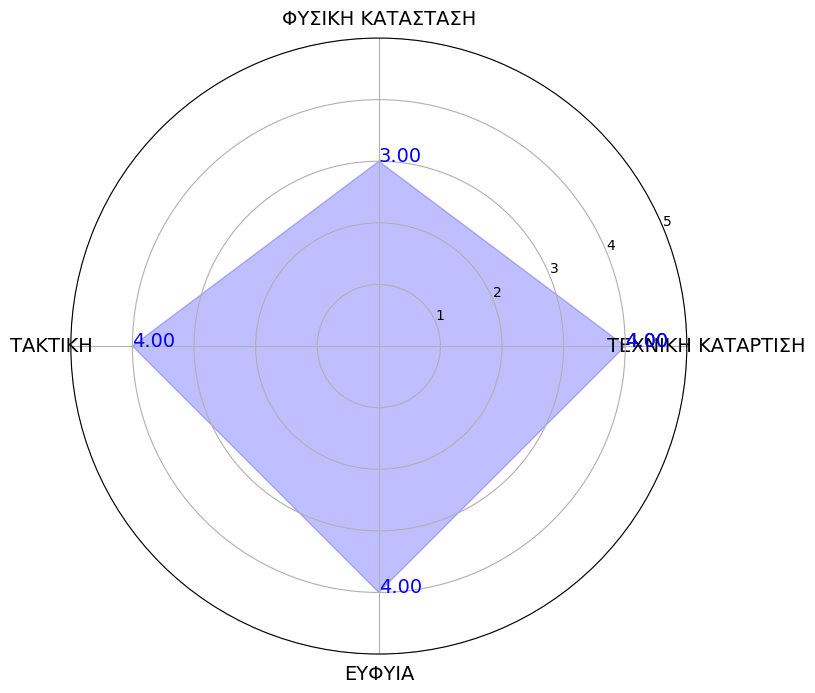

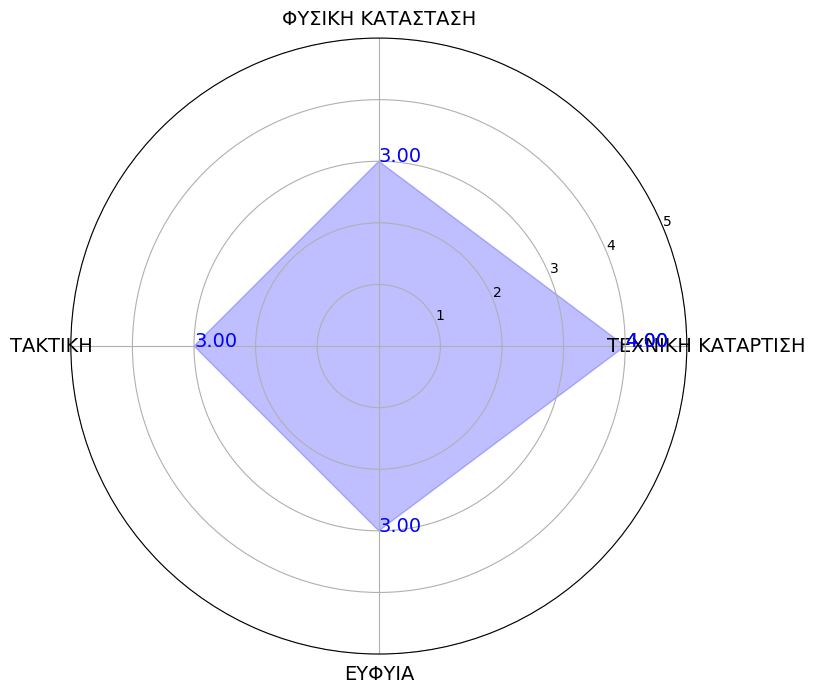

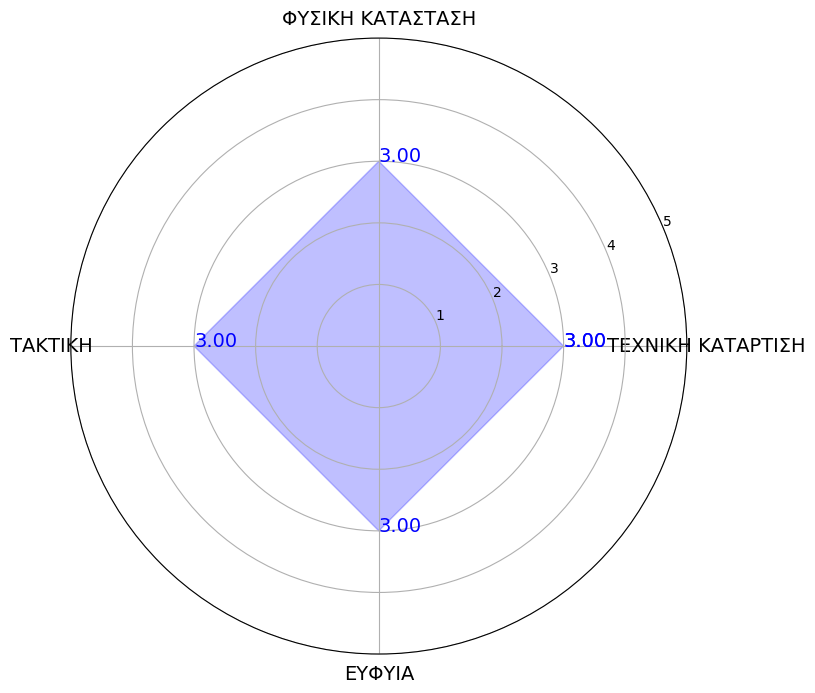

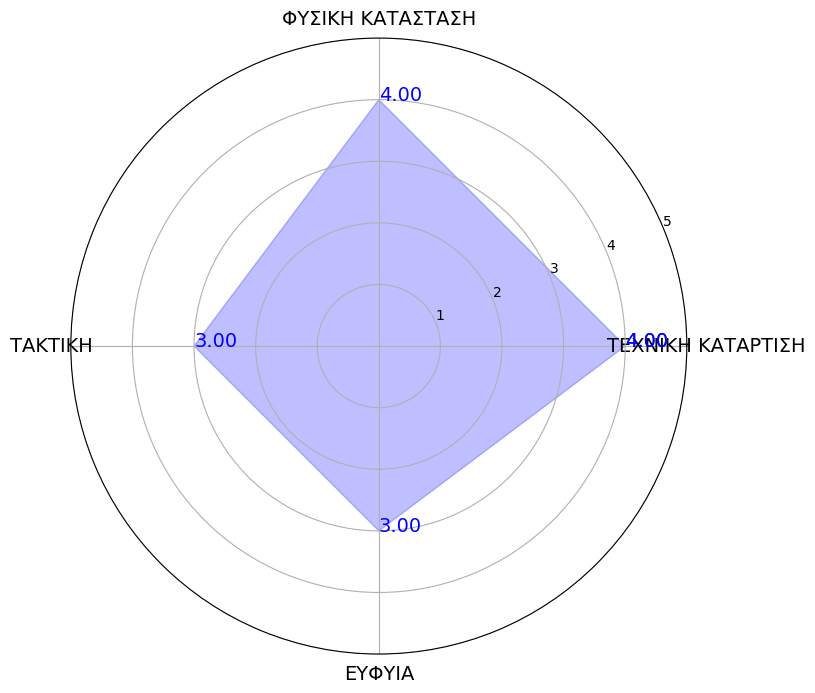

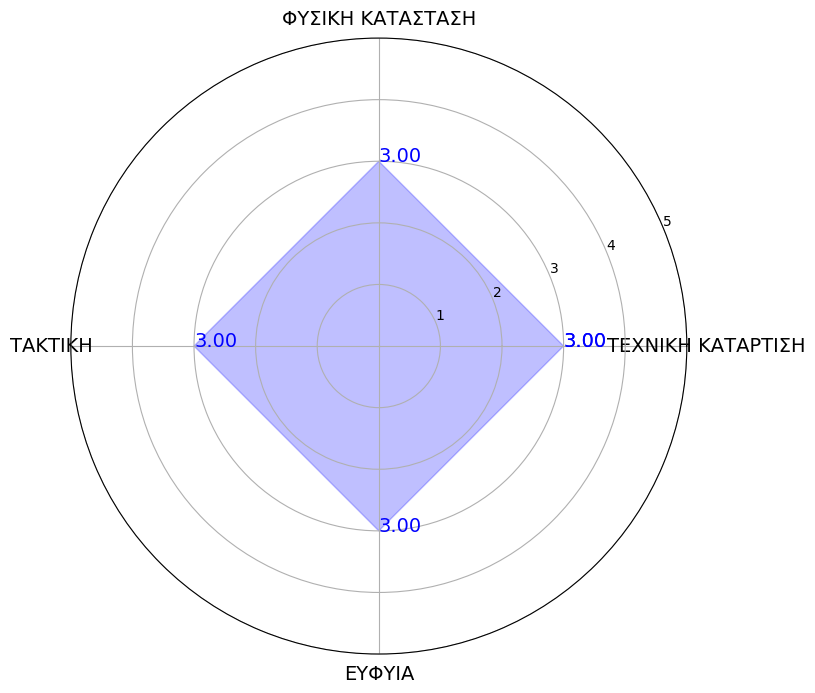

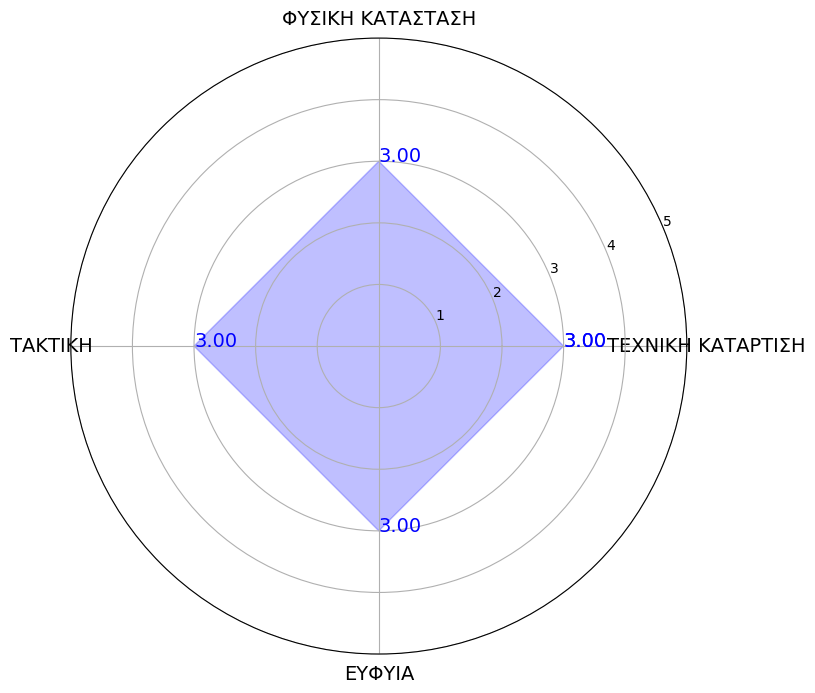

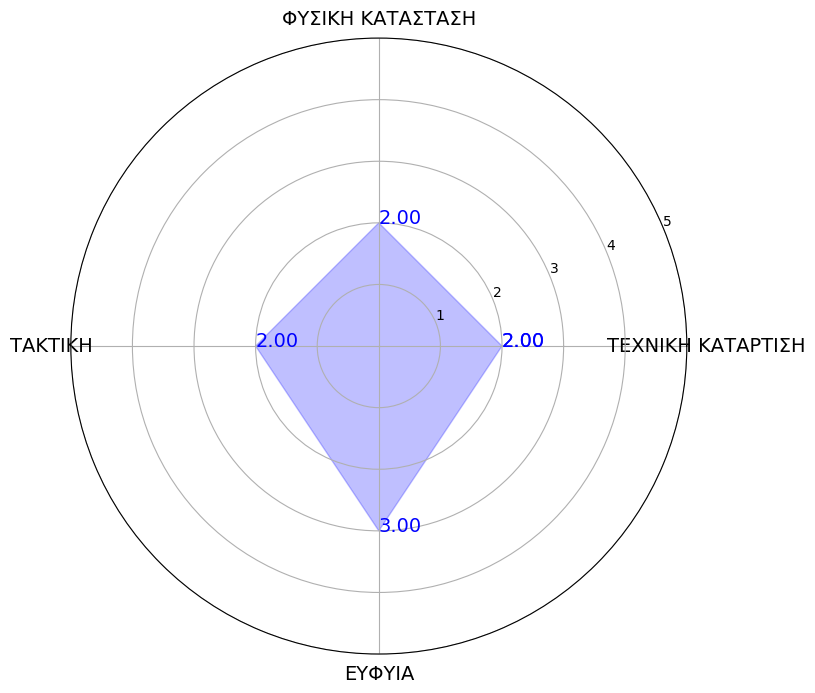

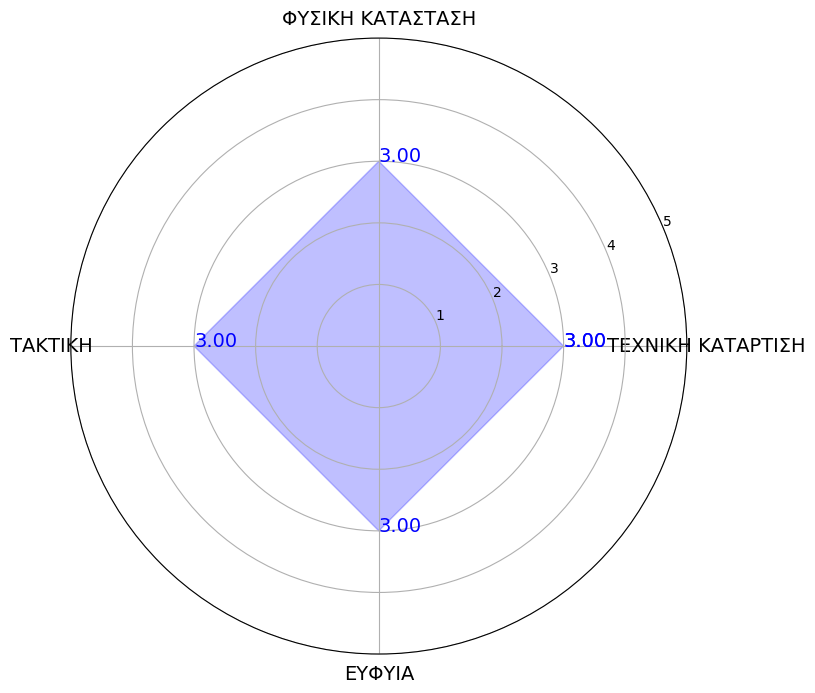

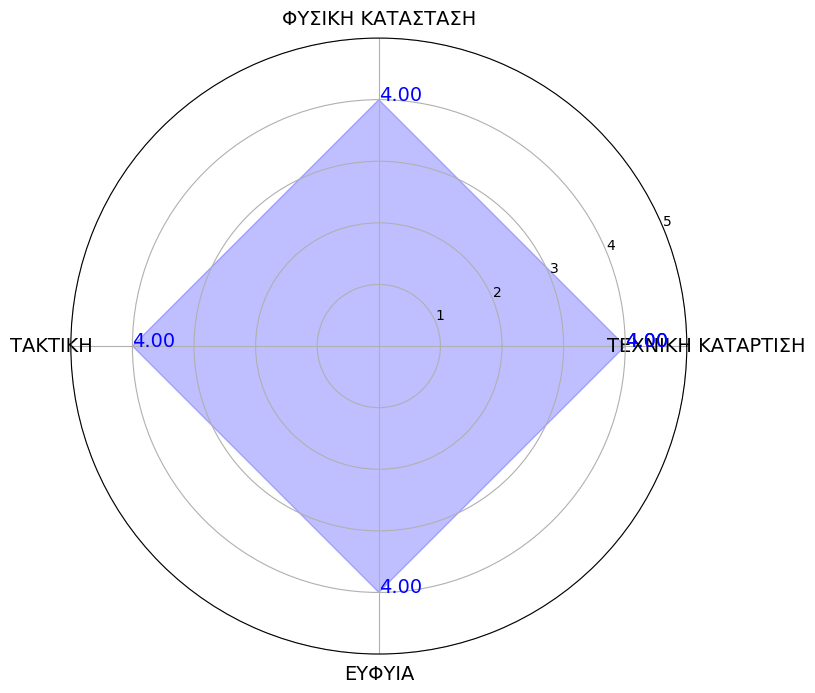

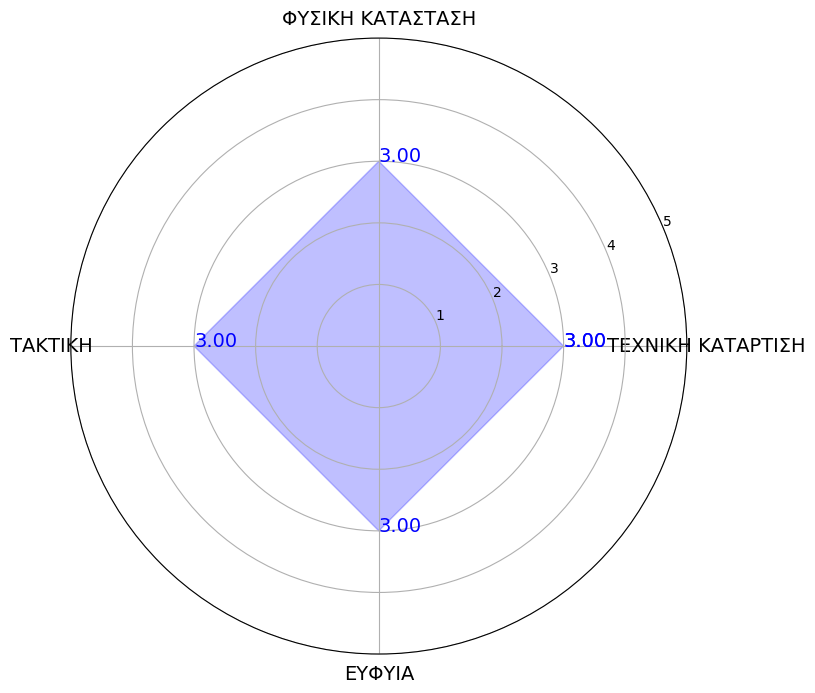

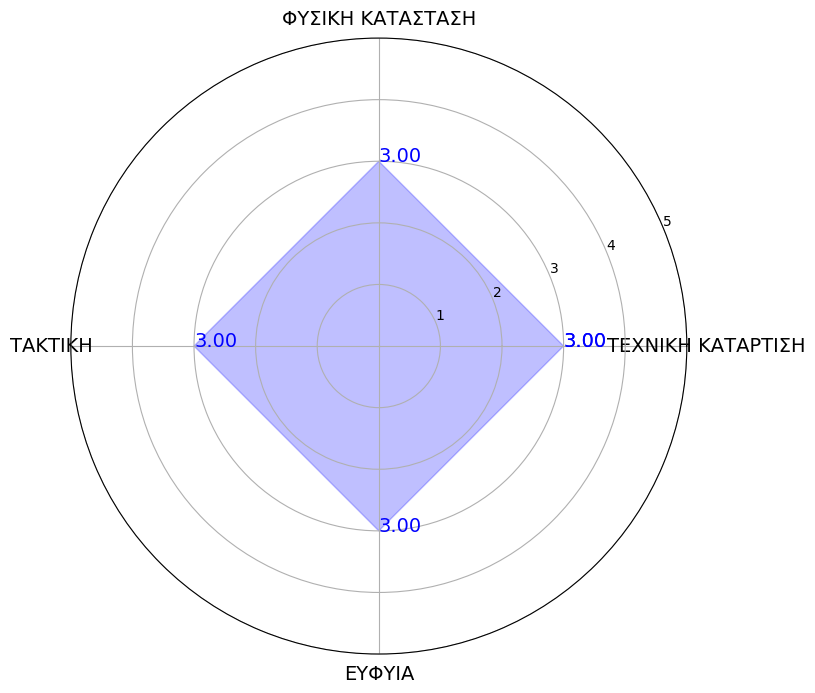

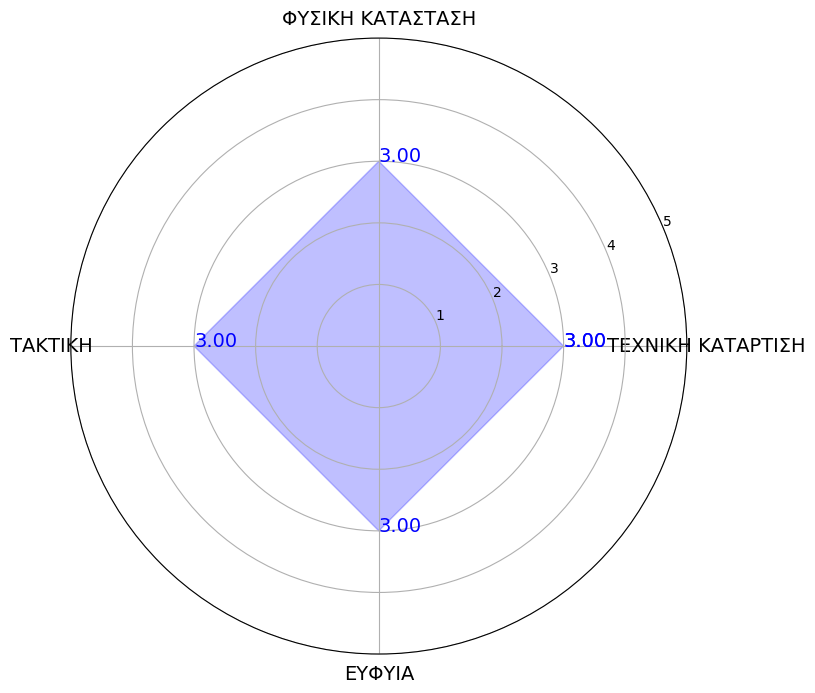

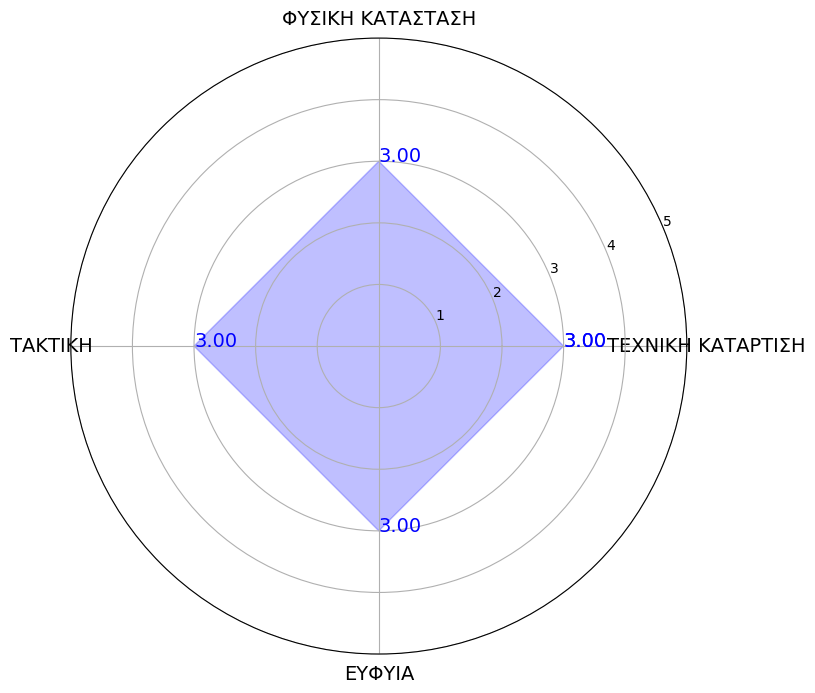

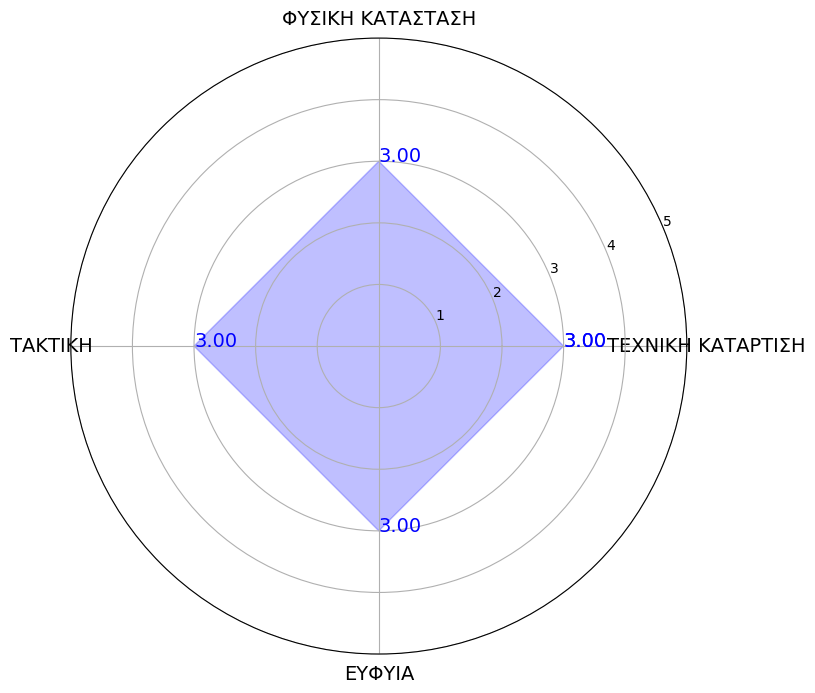

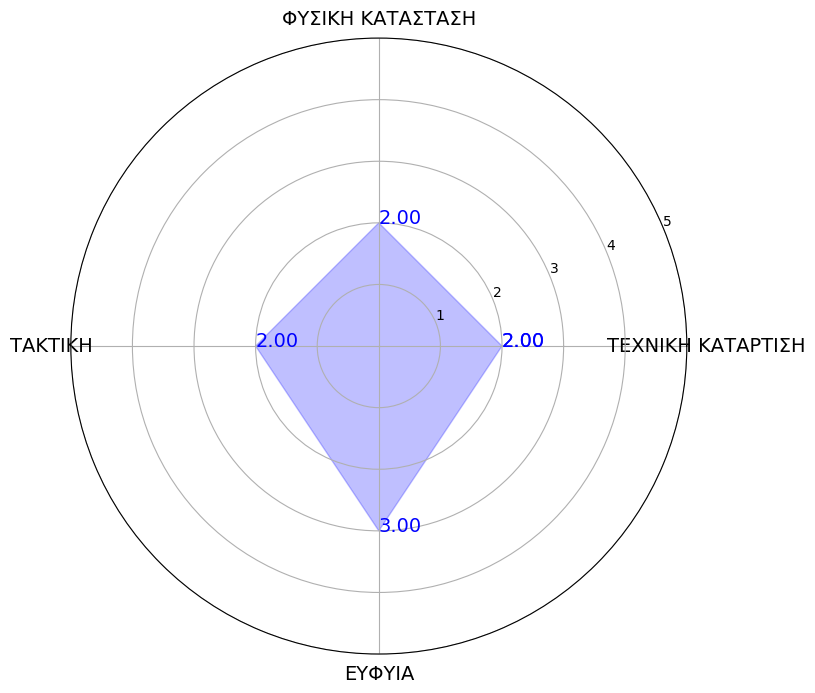

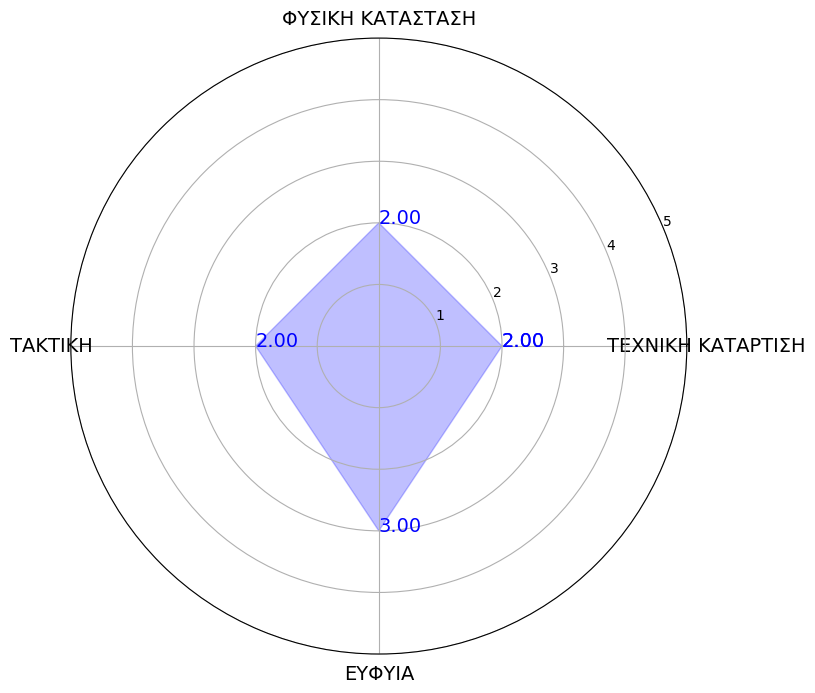

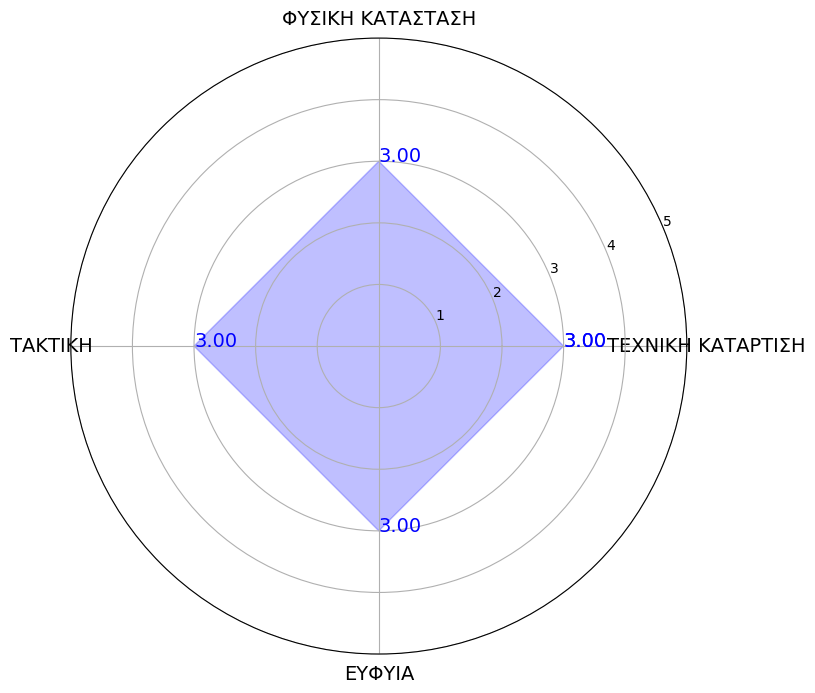

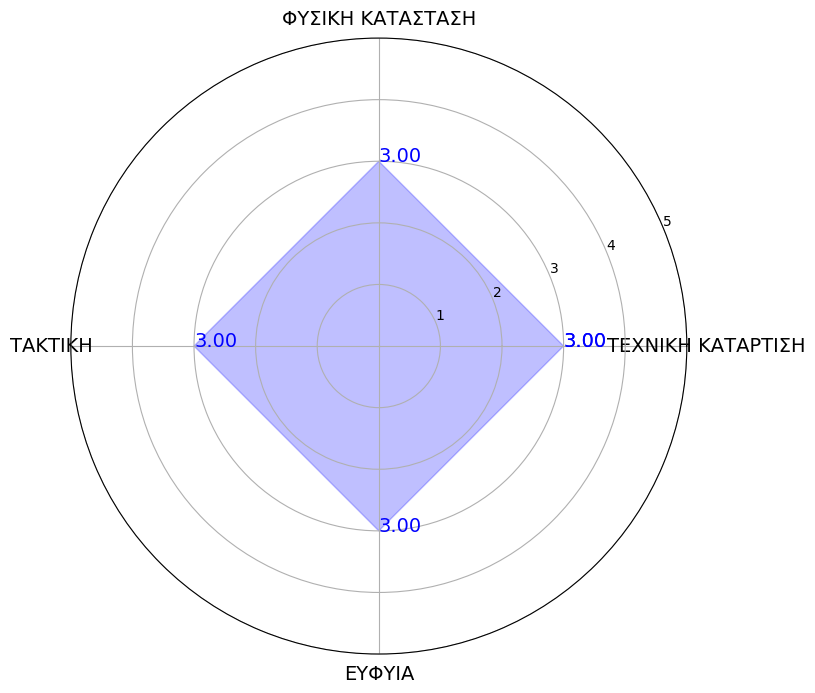

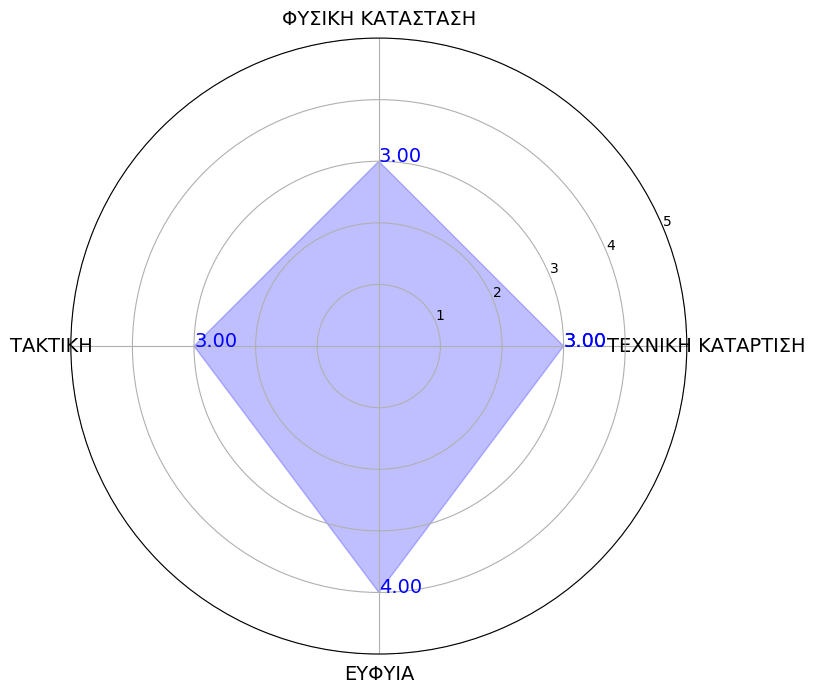

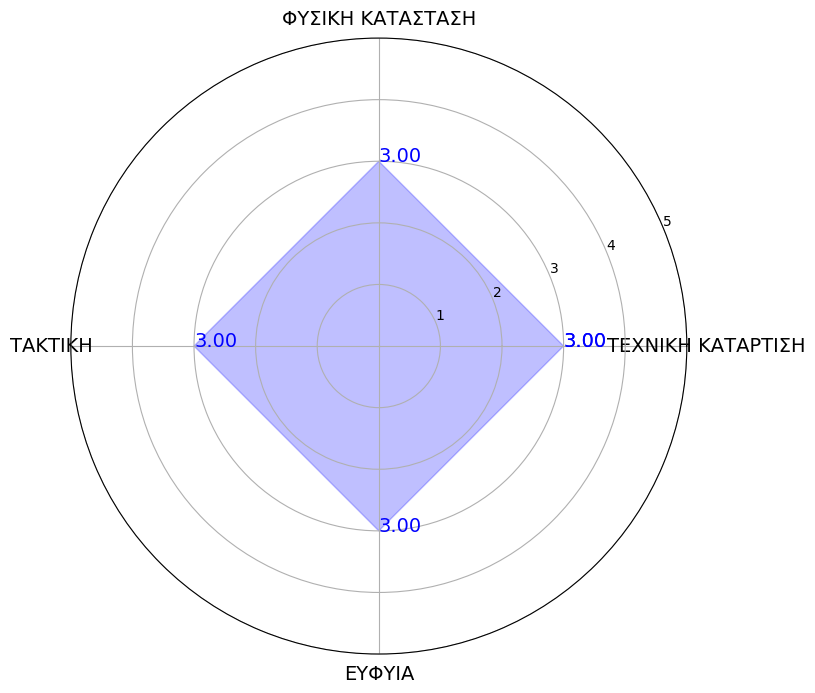

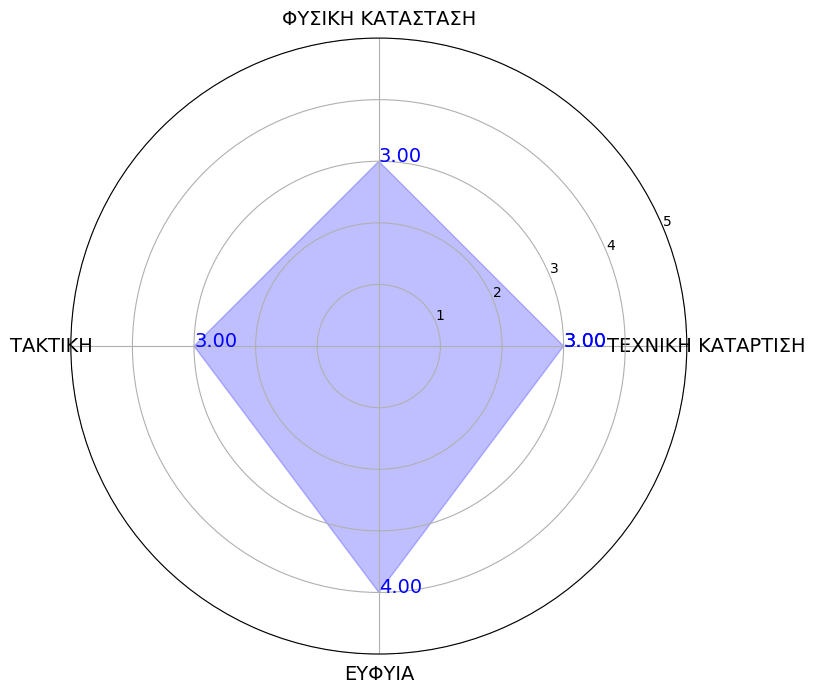

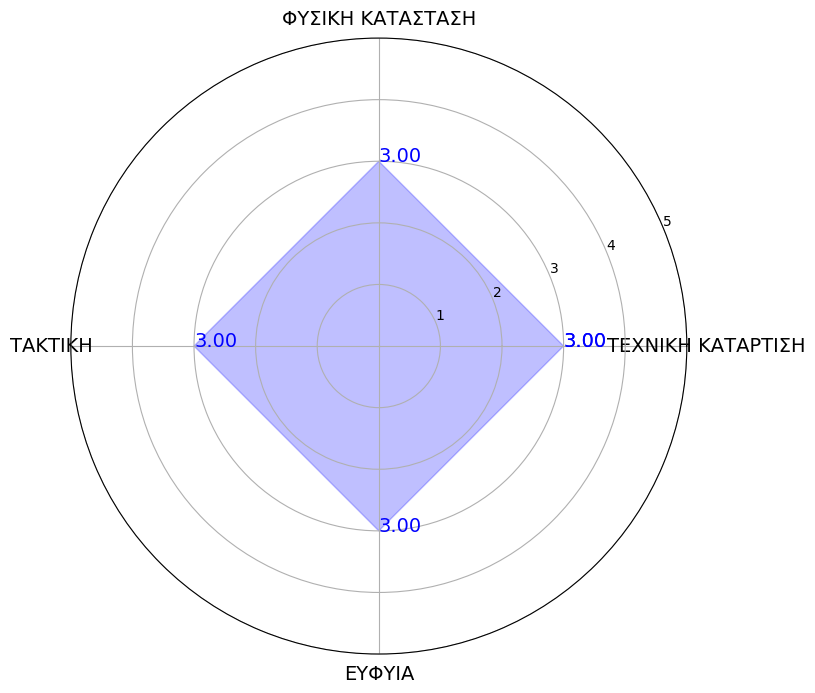

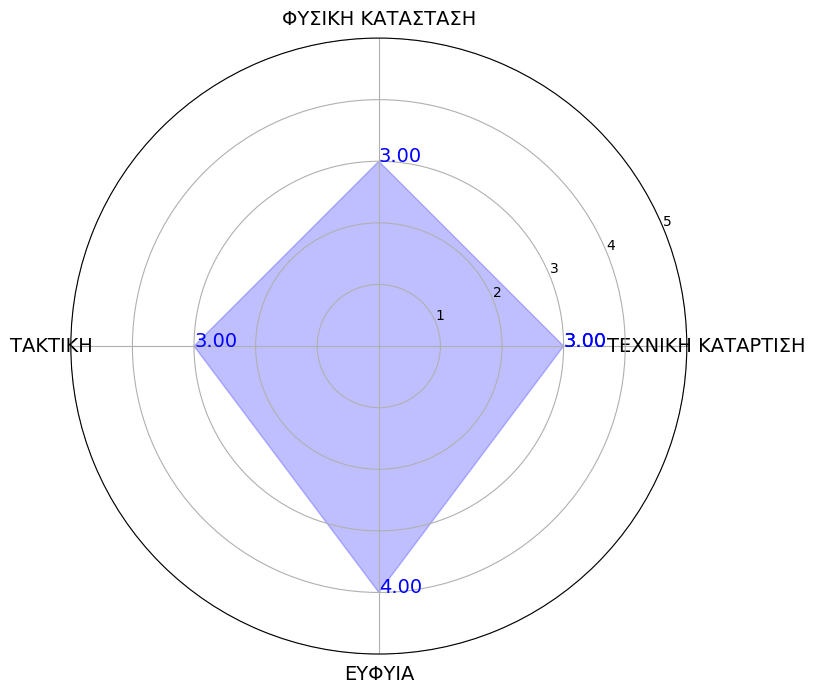

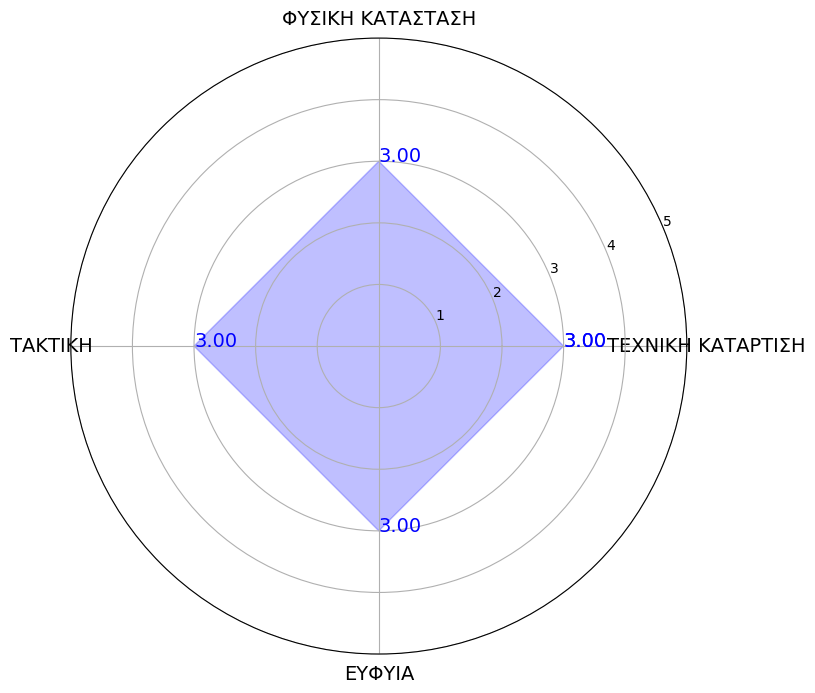

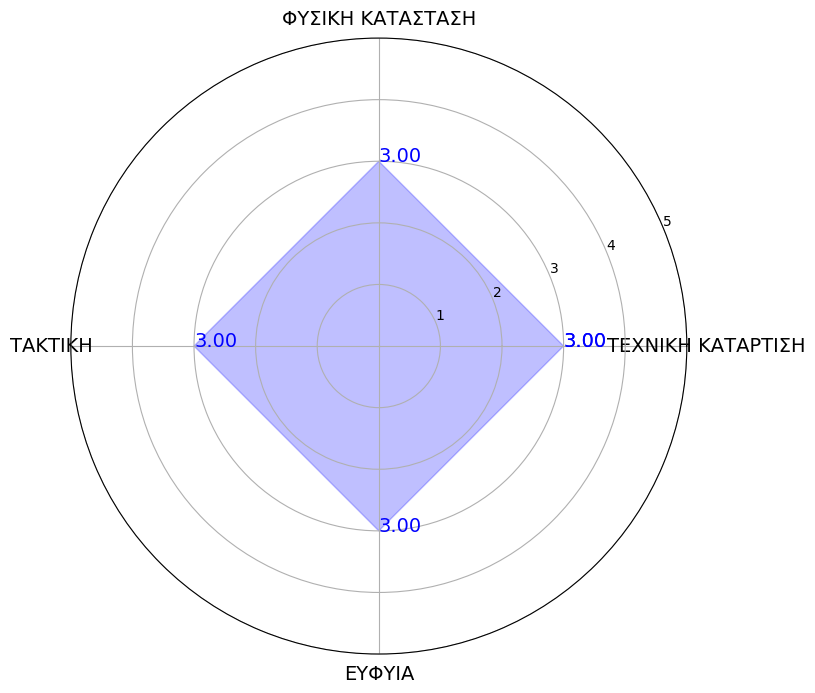

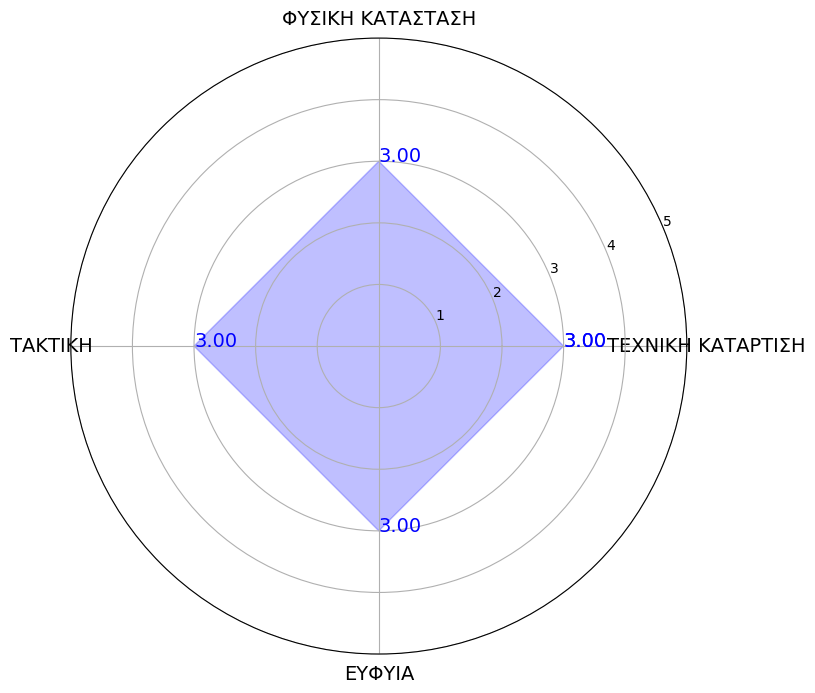

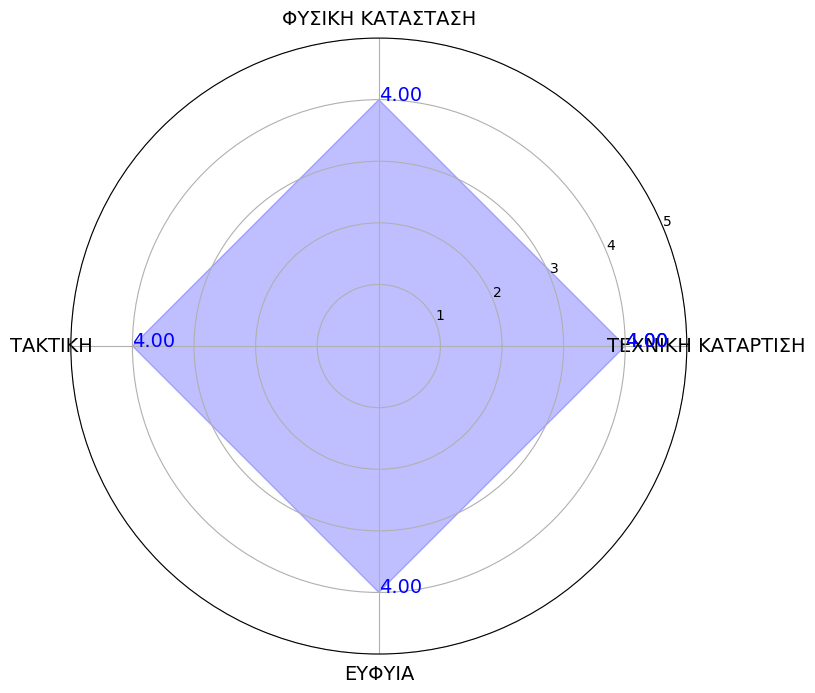

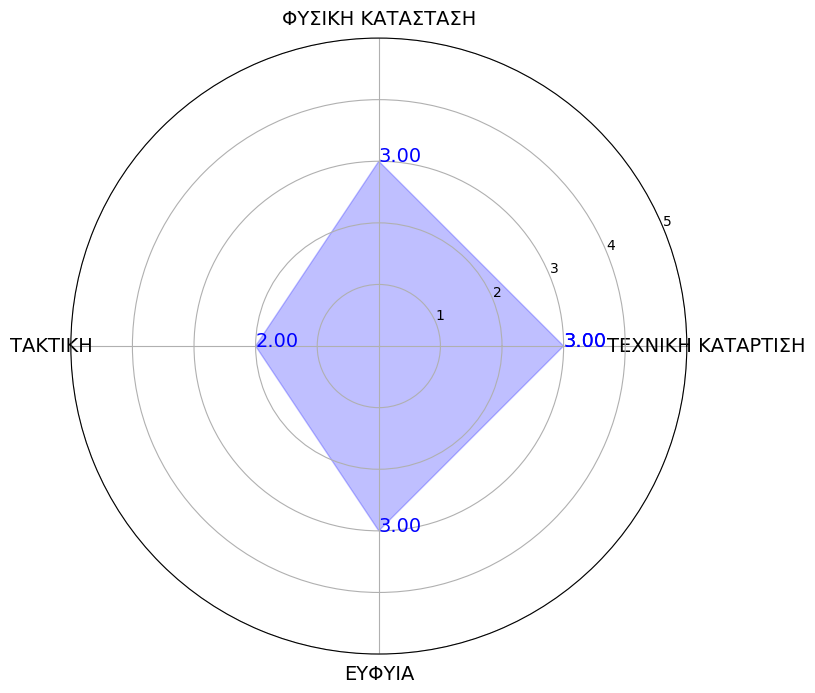

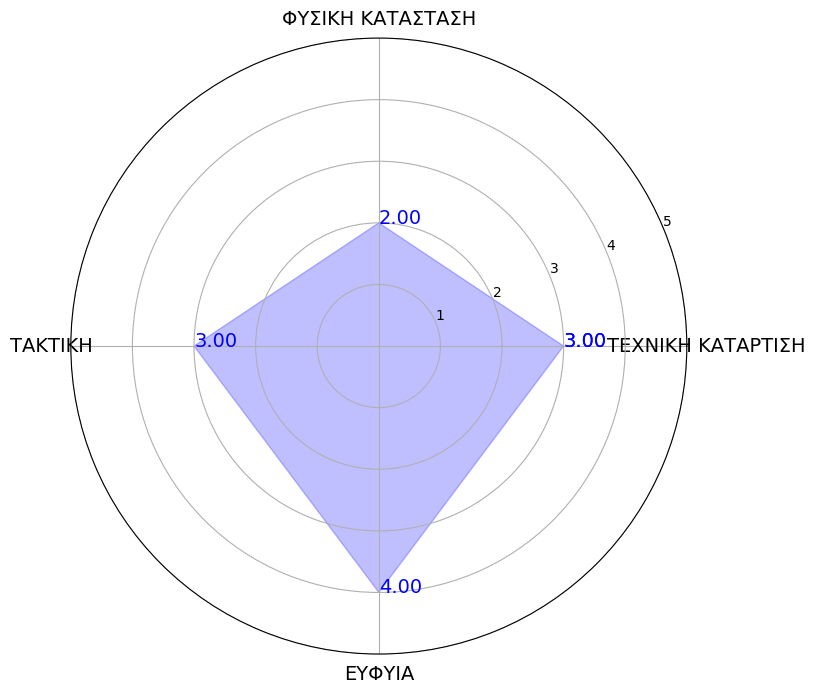

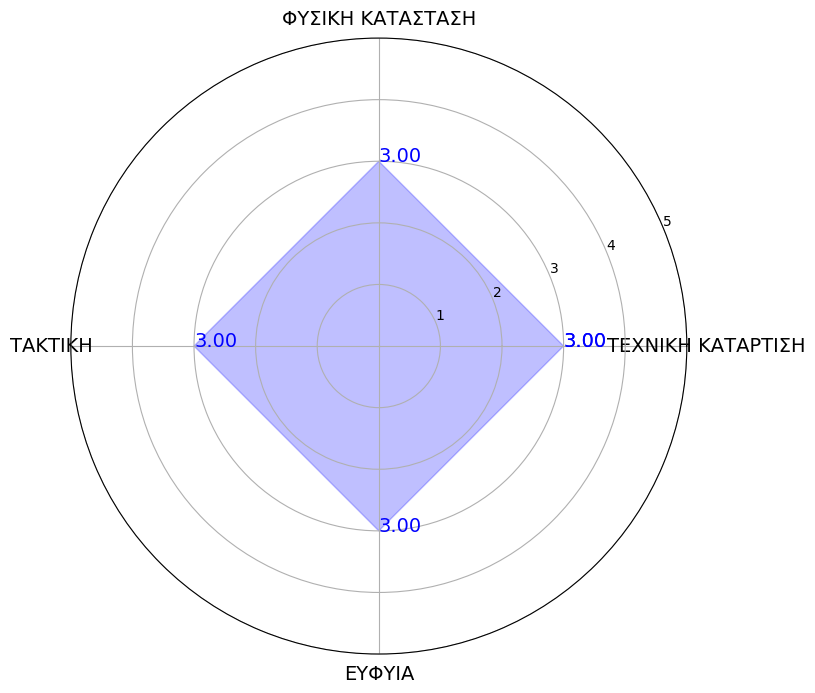

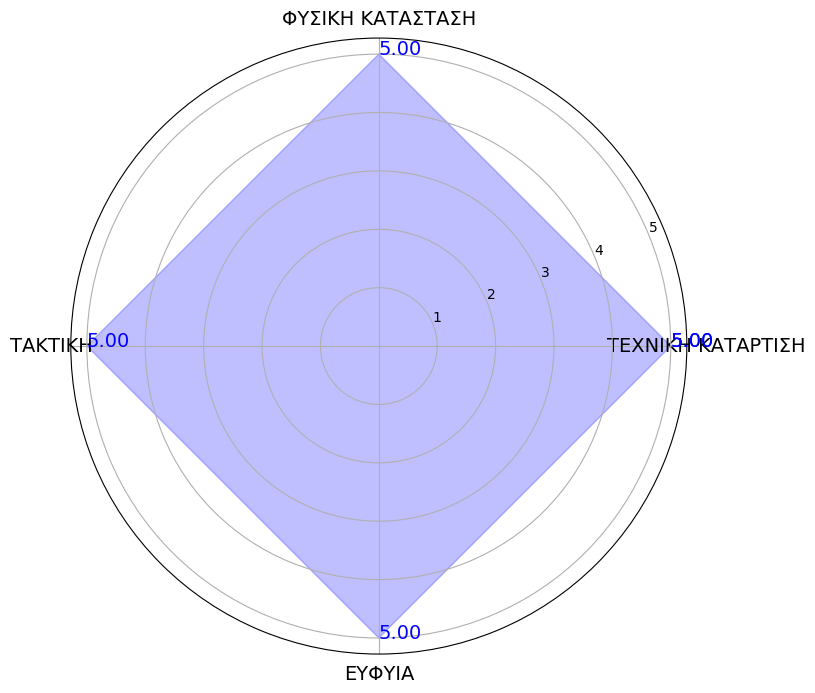

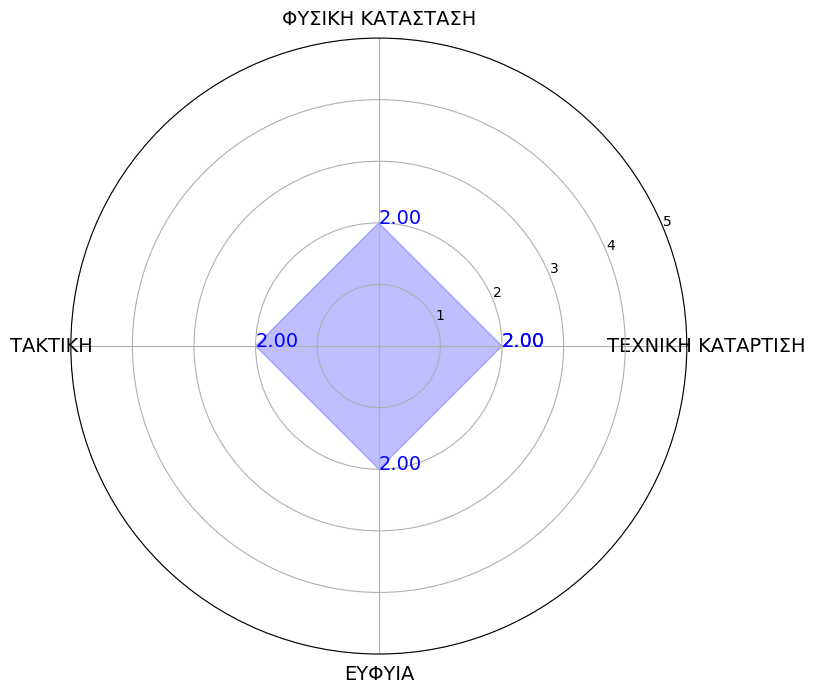

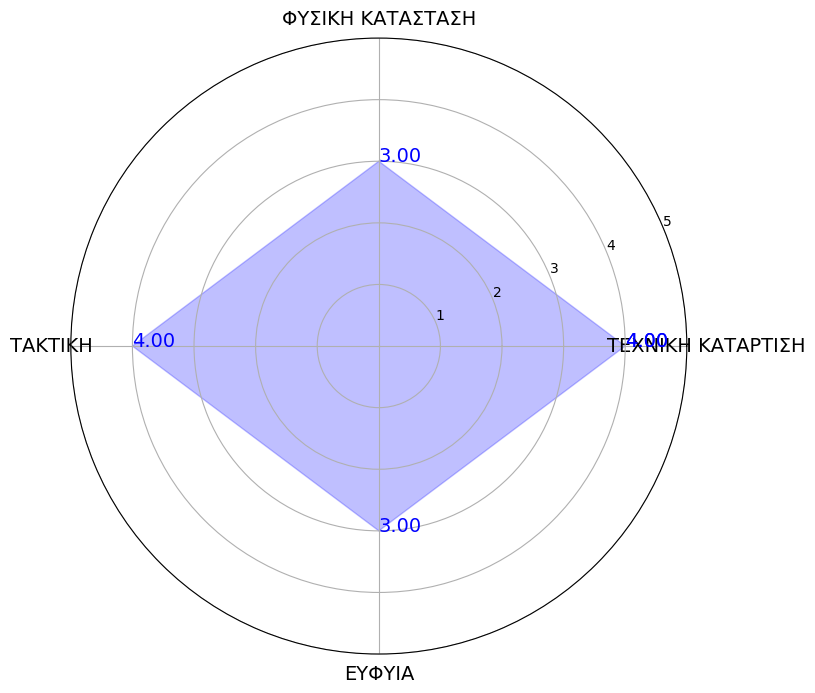

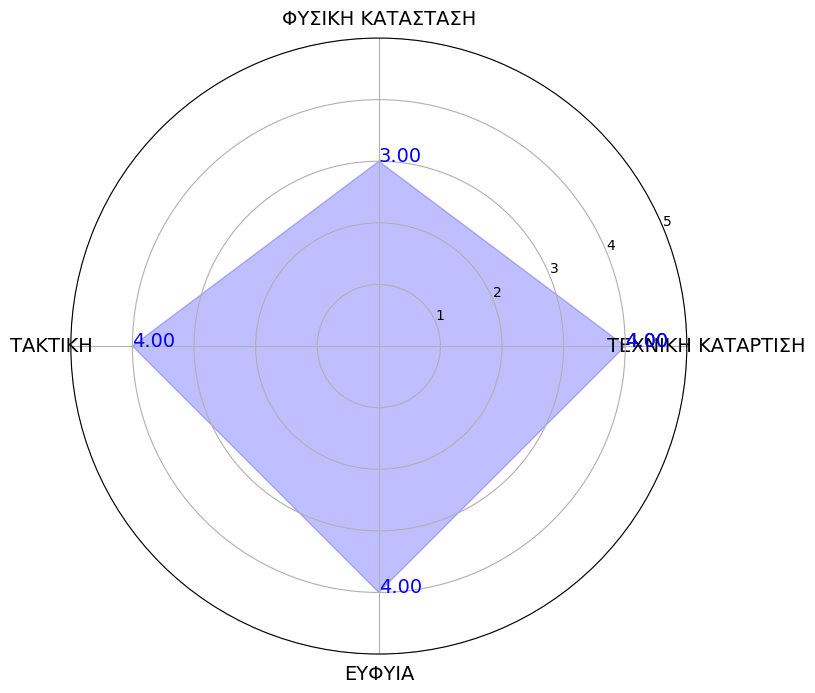

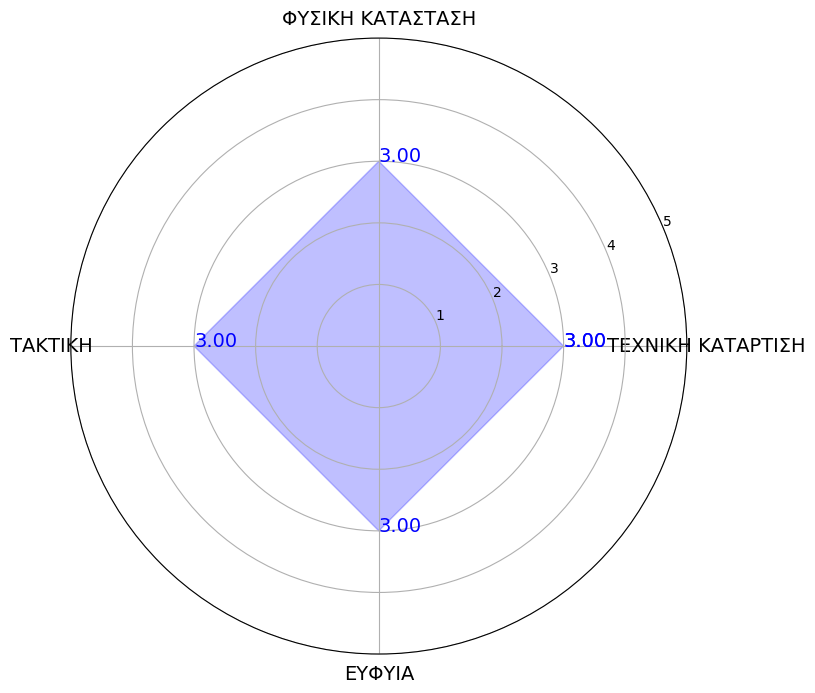

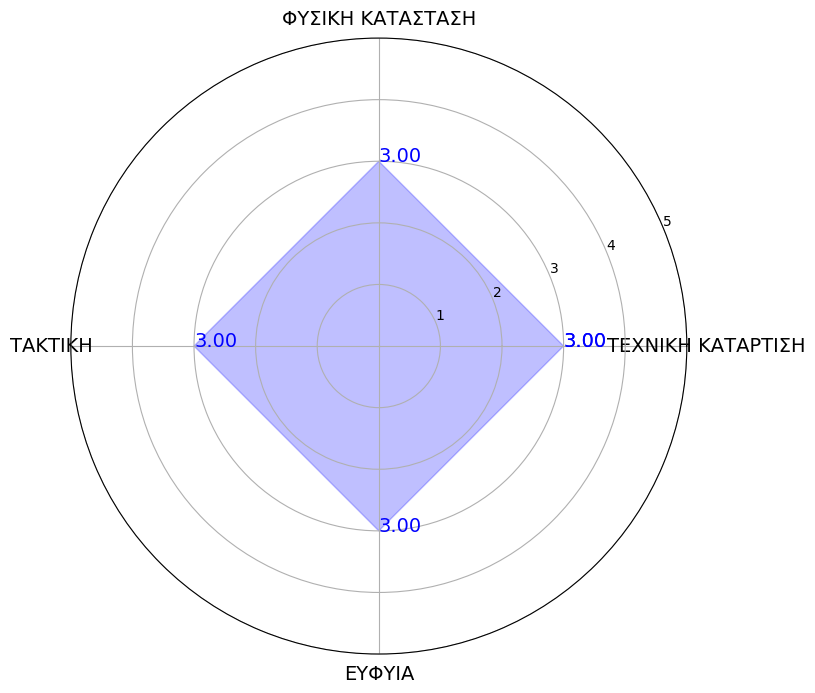

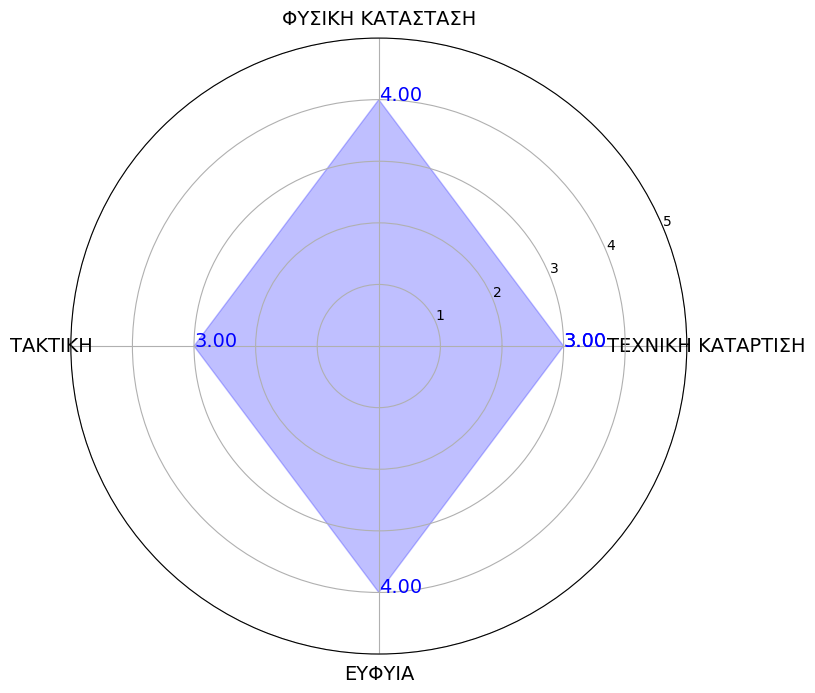

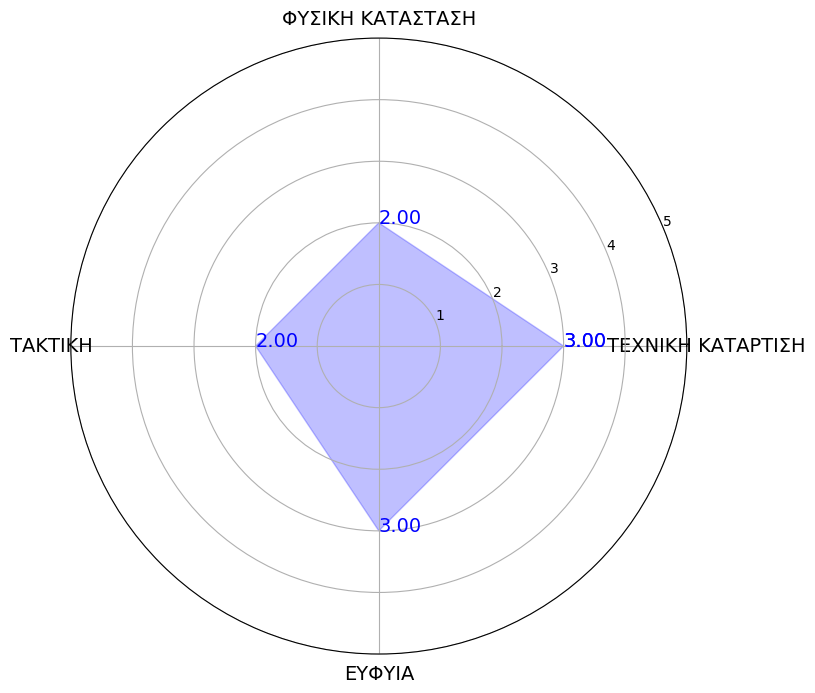

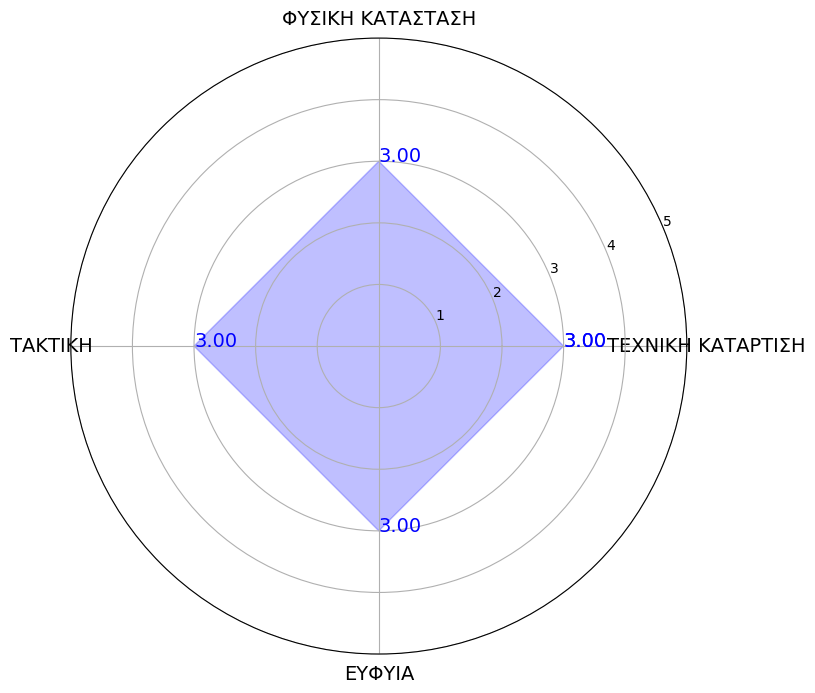

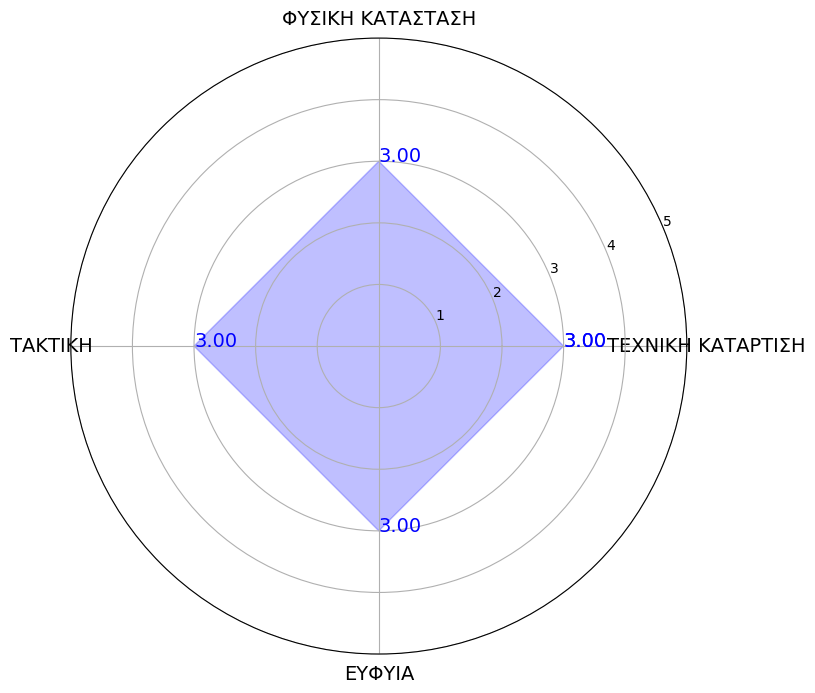

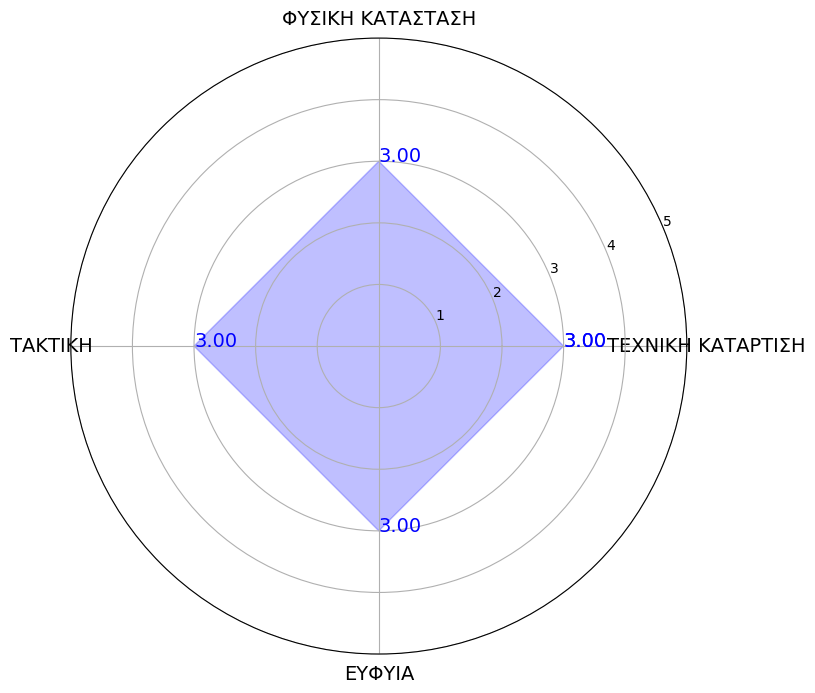

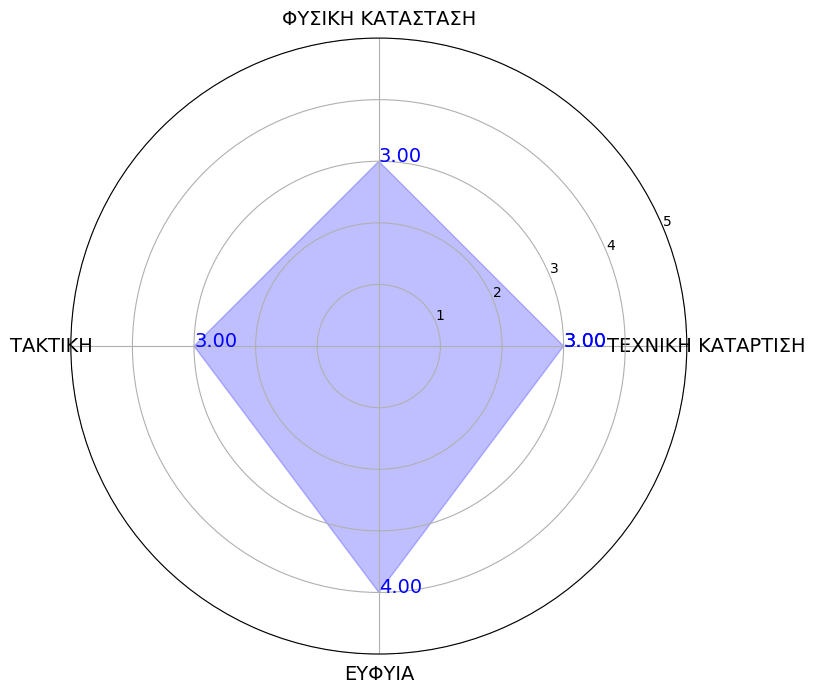

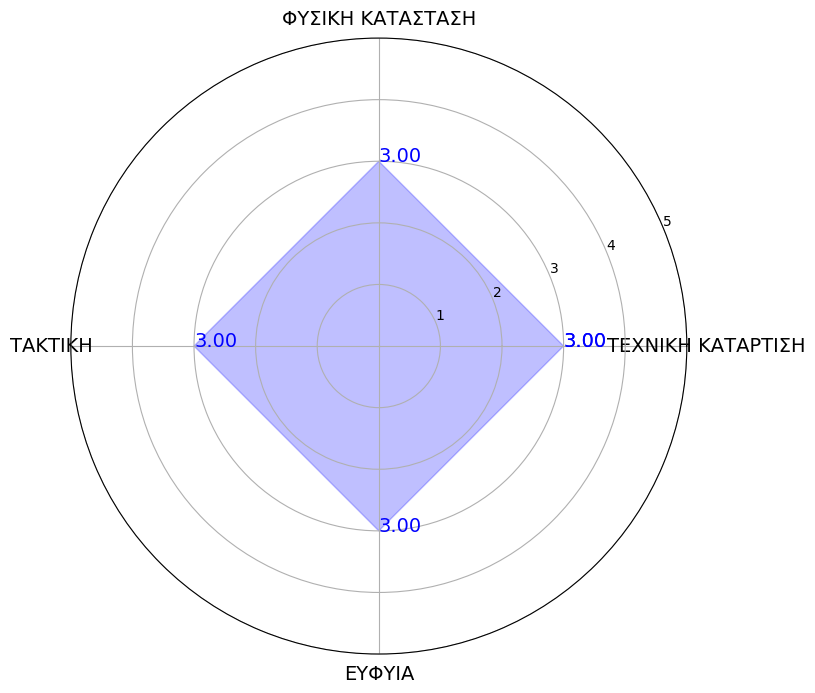

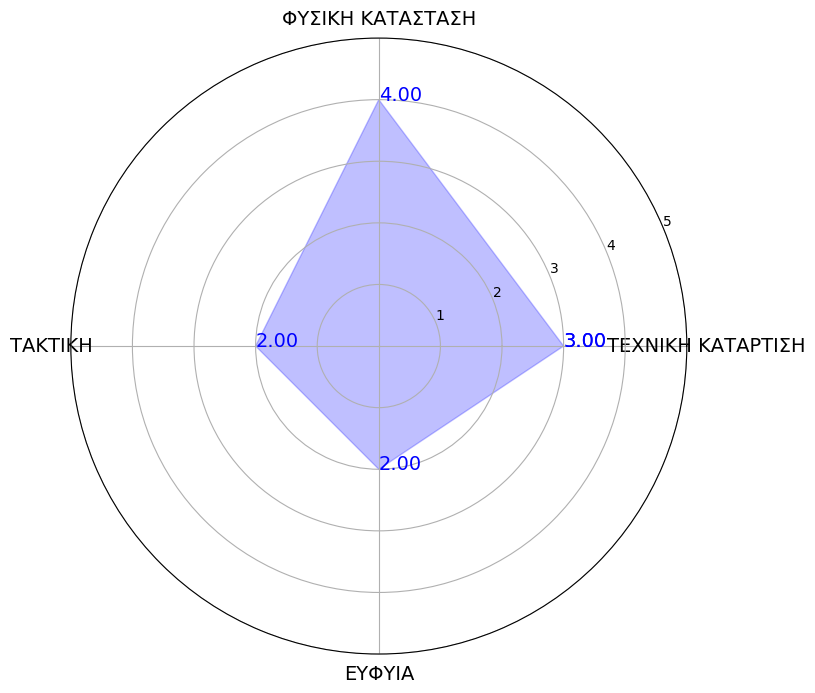

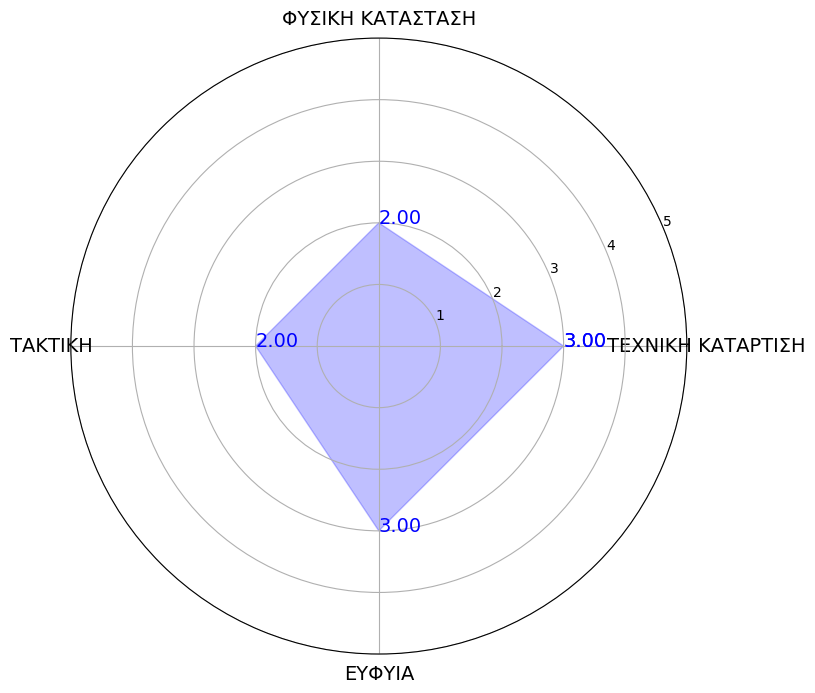

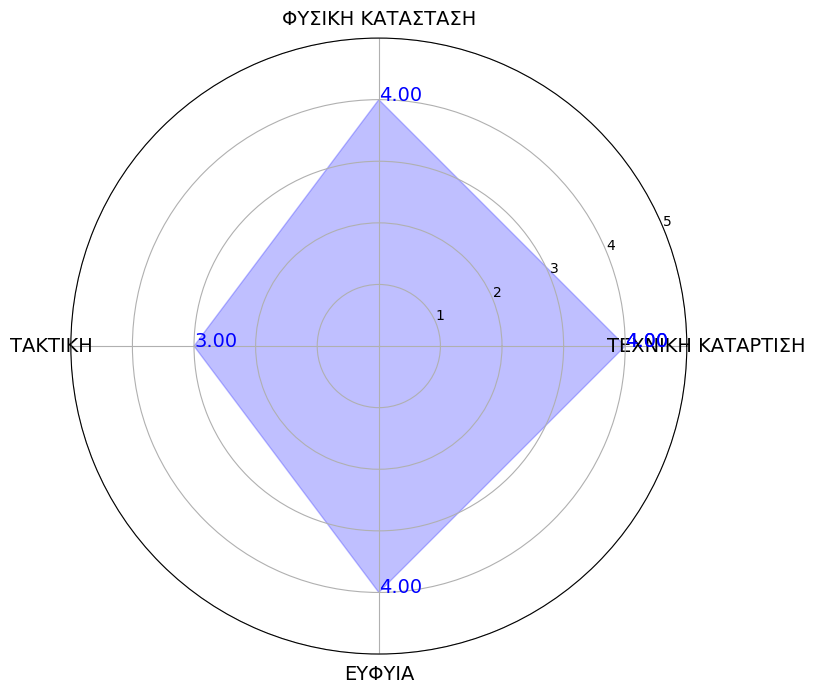

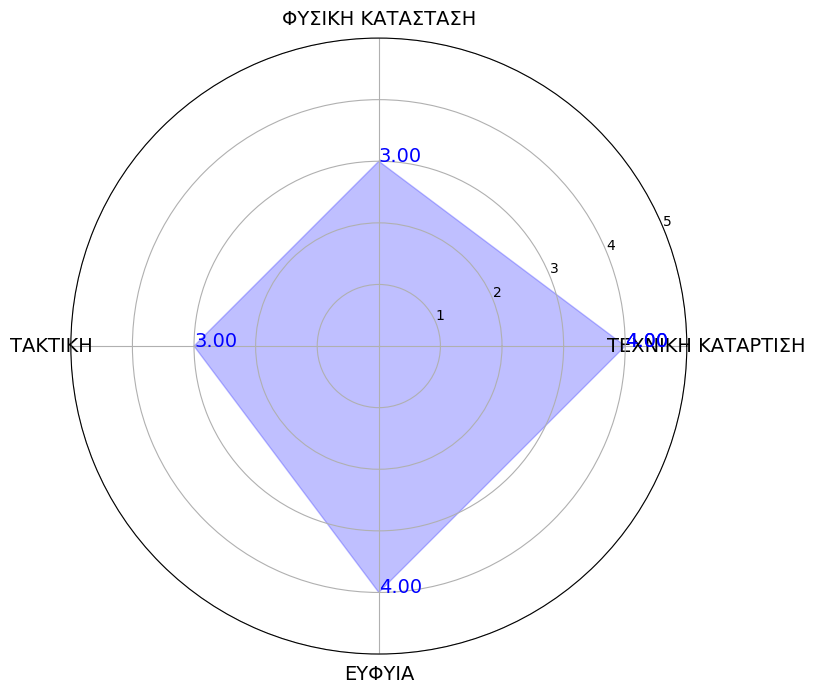

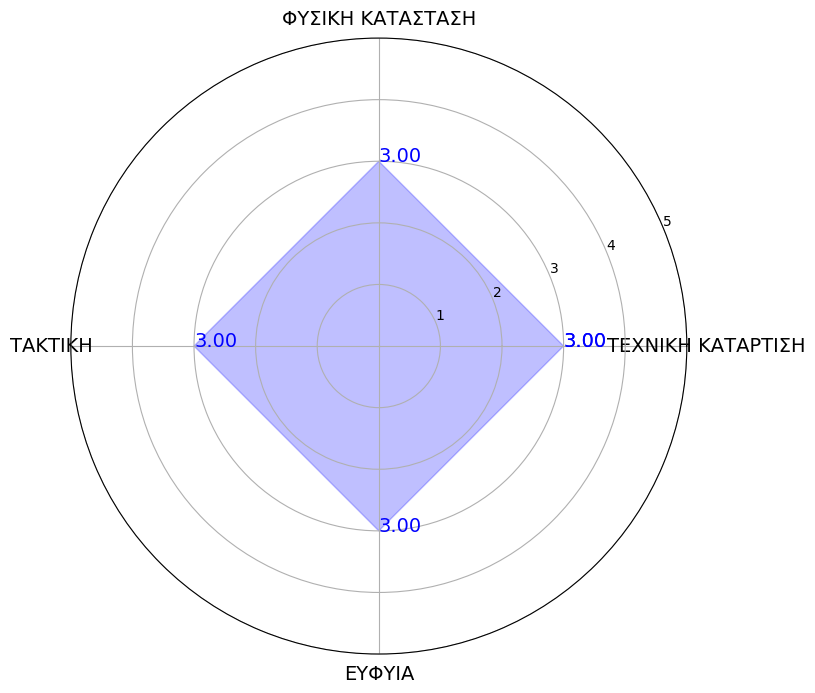

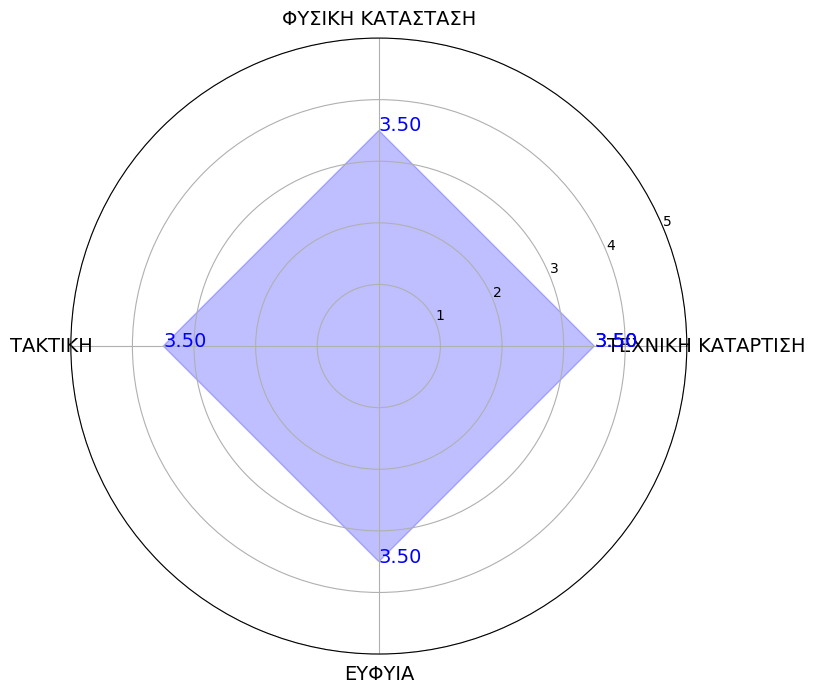

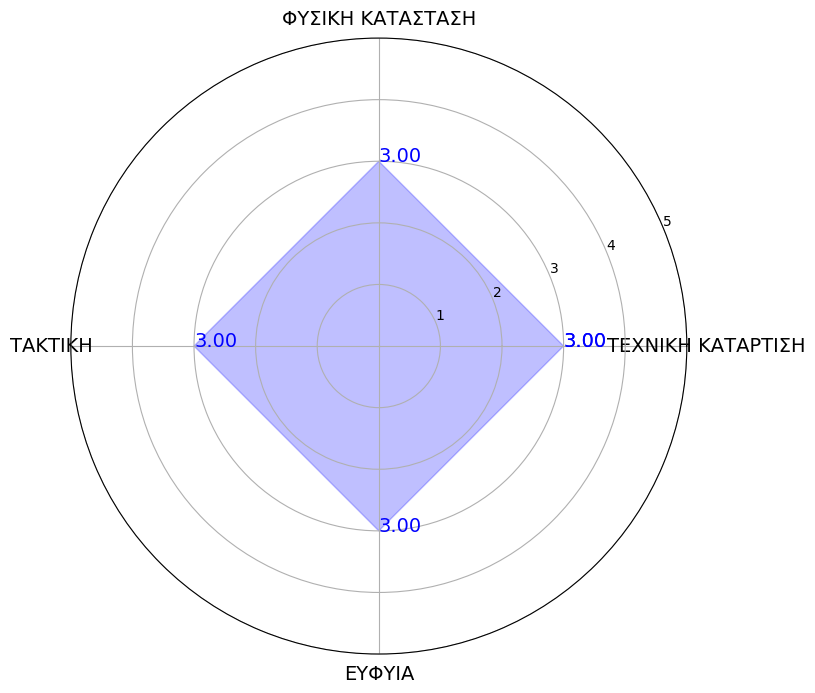

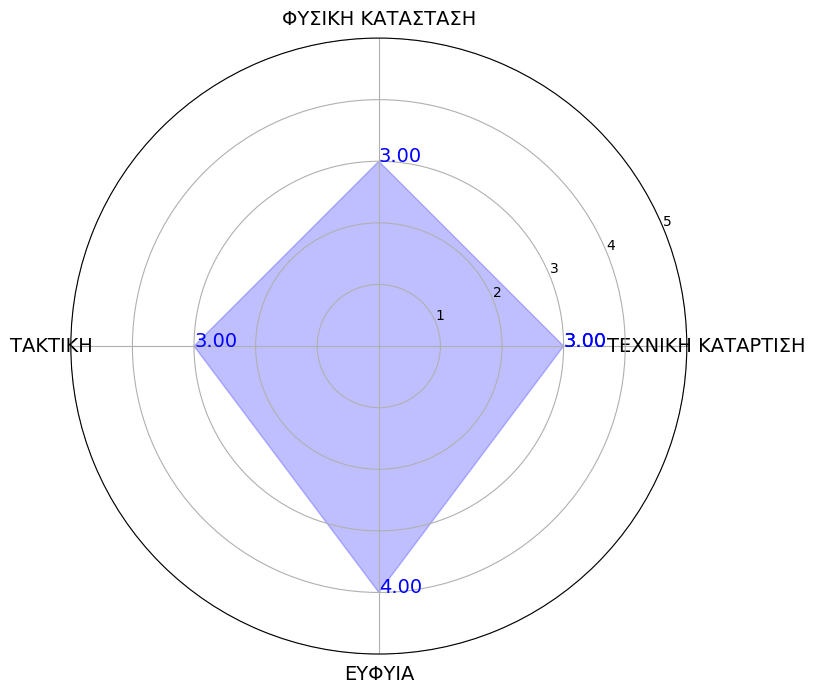

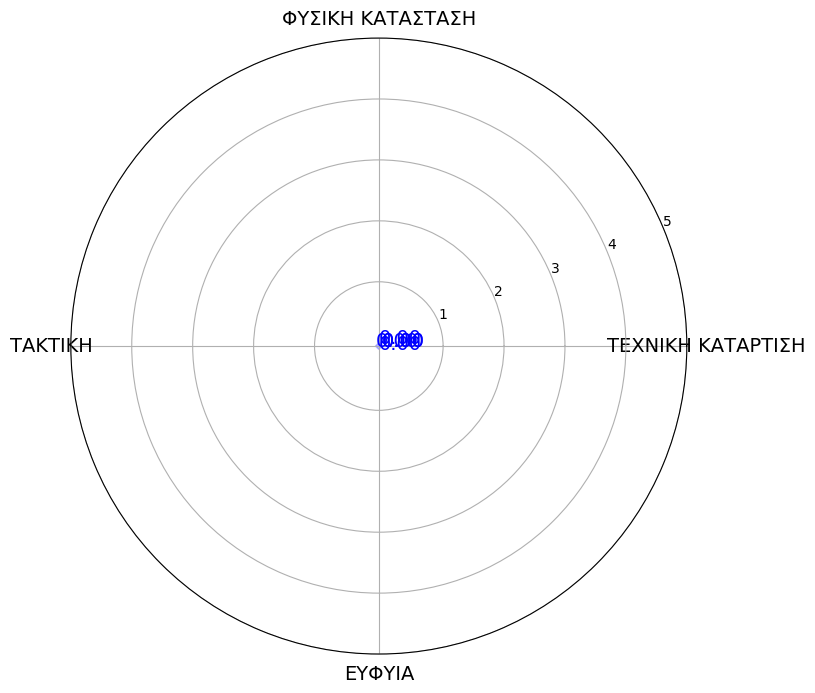

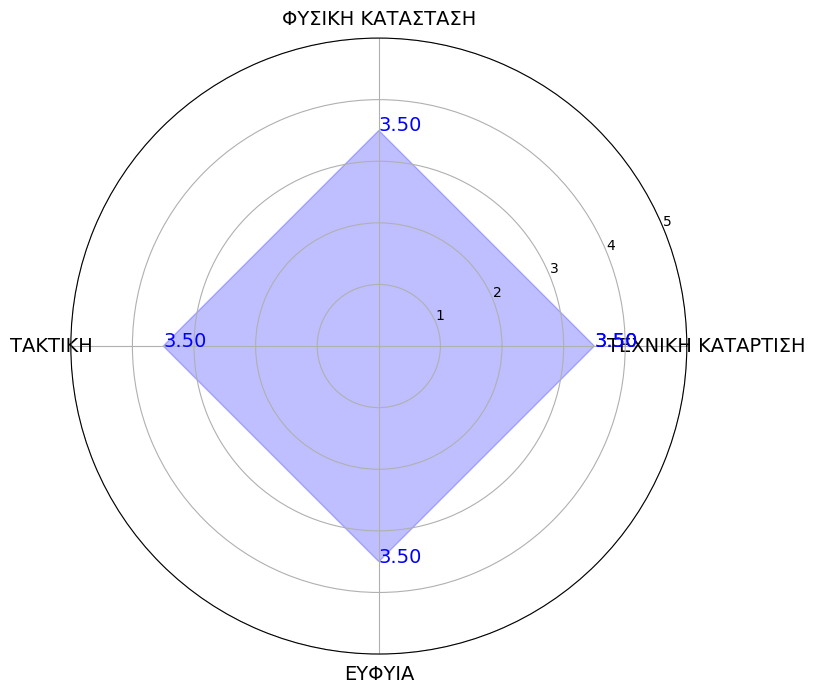

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

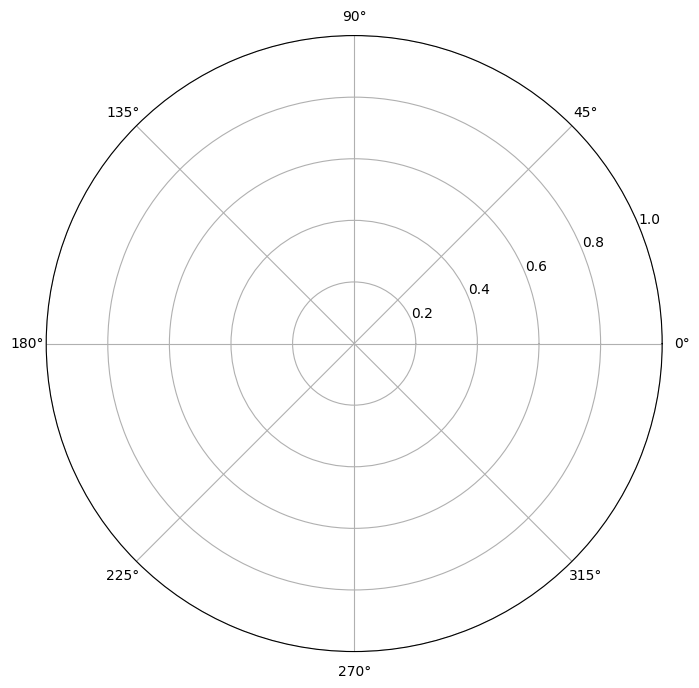

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_radar_chart(player_name, values, attributes, save_path):
    # Number of attributes
    num_attributes = len(attributes)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()

    # The plot is circular, so we need to "close the loop" by adding the starting data point at the end
    values += values[:1]
    angles += angles[:1]

    # Ensure the directory in the file path exists
    directory = os.path.dirname(save_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Create the radar chart with original values
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='b', alpha=0.25)

    # Set the labels for each attribute with larger font size
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=14)

    # Set the radial axis ticks
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels([1, 2, 3, 4, 5])

    # Add data labels on the chart with larger font size
    for i, (angle, value) in enumerate(zip(angles, values)):
        ax.text(angle, value, f'{value:.2f}', color='blue', fontsize=14)

    # Save the radar chart as JPEG without cropping any letters
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    # Show the radar chart
    plt.show()

# Prompt user to provide the file path
file_path = input("Enter the path to the Excel file: ")
df = pd.read_excel(file_path)

# Prompt user to provide the attribute names
common_attributes = input("Enter common attributes (comma-separated): ").split(',')

# Display available columns and check for correct column names
for attribute in common_attributes:
    if attribute.strip() not in df.columns:
        print(f"Warning: Column '{attribute}' not found in DataFrame.")

# Get a list of unique player names
players = df['ΕΠΩΝΥΜΟ'].unique()

# Compare players and create radar charts
for player in players:
    # Check if the player's name is empty
    if not player:
        print("Empty player name. Skipping...")
        continue

    player_data = df.loc[df['ΕΠΩΝΥΜΟ'] == player, common_attributes].values.flatten().tolist()
    player_save_path = input(f"Enter the save path for {player} radar chart (including filename and extension): ")
    create_radar_chart(player, player_data[:len(common_attributes)], common_attributes, player_save_path)

print("Done")
